In [2]:
import pandas as pd
import numpy as np
import pyccl as ccl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

## Read in comological params from fid_vals.sh file

In [2]:
cosmo_params = dict()
with open("fid_values.sh", 'r') as f:
    for line in f:
        if line[0] != '#' and line[0] != '\n':
            words = line.split("=")
            cosmo_params[words[0]] = float(words[1][:])

In [3]:
cosmo_params["N_eff"] = 3.046

First thing we do to do a calculation in CCL is set up a cosmology object, this holds things like cosmological parameters.

In [6]:
cosmo = ccl.Cosmology(Omega_c = cosmo_params['om_m'],
                          Omega_b = cosmo_params['om_b'], 
                          h = cosmo_params['h0'],
                          A_s = cosmo_params['A_s'], 
                          n_s = cosmo_params['n_s'], 
                          Neff = cosmo_params['N_eff'], 
                          w0=cosmo_params['w0'], 
                          wa=cosmo_params['wa'])

Load the dNdz file (its already binned into seperate columns)

In [47]:
z_dNdz = np.loadtxt("tomo_lensing.dat")
z = z_dNdz[:, 0]
dNdz = z_dNdz[:, 1:]
nbins = dNdz.shape[-1]

Make lensing tracers for each bin

In [8]:
tracers = []
for i in range(dNdz.shape[-1]):
    # We need (z, dNdz) as a tuple for CCL:
    z_dNdz = (z, dNdz[:, i])
    
    # We mostly will use the defaults here. By using the defaults, we are assuming 
    # that there are no intrinsic alignments affecting this tracer (not physically realistic
    # but the simplest case for debugging.)
    tracers.append(ccl.WeakLensingTracer(cosmo, dndz=z_dNdz))

Stick each pair of tracers together to get auto and cross correlations; 
the orderings are the same as COSMOSIS

In [48]:
orderings = [(i, j) for j in range(1, nbins+1) for i in range(1, j+1)]

In [10]:
cls = []
ells = np.arange(76, 1000)
for ordering in orderings:
    index1 = ordering[0] - 1
    index2 = ordering[1] - 1
    cls.append(ccl.angular_cl(cosmo, tracers[index1], tracers[index2], ells))

In [11]:
plt.loglog(ells, cls[0])
plt.loglog(np.loadtxt("out_w0_sn_all/equal_space/1_bins/Cl_fid.dat")[:, 0], \
           np.loadtxt("out_w0_sn_all/equal_space/1_bins/Cl_fid.dat")[:, 1])

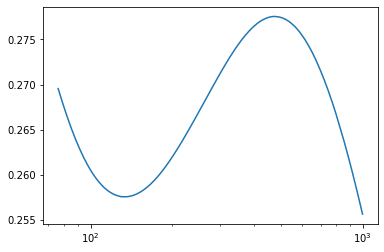

In [12]:
plt.semilogx(ells, cls[0]/np.loadtxt("out_w0_sn_all/equal_space/1_bins/Cl_fid.dat")[:, 1]) 
plt.show()

In [21]:
cosmo

AttributeError: 'Cosmology' object has no attribute '__lib__'

See how C_ells change by stepping up A_s

In [55]:
cosmo_params_plus = {i:cosmo_params[i] for i in cosmo_params}

In [56]:
cosmo_params_plus["A_s"] = cosmo_params["A_s"] + 0.1*cosmo_params["A_s"]

In [57]:
cosmo_plus = ccl.Cosmology(Omega_c = cosmo_params_plus['om_m'],
                          Omega_b = cosmo_params_plus['om_b'], 
                          h = cosmo_params_plus['h0'], 
                          A_s = cosmo_params_plus['A_s'], 
                          n_s = cosmo_params_plus['n_s'], 
                          Neff = cosmo_params_plus['N_eff'], 
                          w0=cosmo_params_plus['w0'], 
                          wa=cosmo_params_plus['wa'])

In [58]:
tracers = []
for i in range(dNdz.shape[-1]):
    # We need (z, dNdz) as a tuple for CCL:
    z_dNdz = (z, dNdz[:, i])
    
    # We mostly will use the defaults here. By using the defaults, we are assuming 
    # that there are no intrinsic alignments affecting this tracer (not physically realistic
    # but the simplest case for debugging.)
    tracers.append(ccl.WeakLensingTracer(cosmo_plus, dndz=z_dNdz))

In [59]:
cls_plus = []
ells = np.arange(76, 1000)
for ordering in orderings:
    index1 = ordering[0] - 1
    index2 = ordering[1] - 1
    cls_plus.append(ccl.angular_cl(cosmo_plus, tracers[index1], tracers[index2], ells))

In [60]:
for i in range(len(cls)):
    print(cls[i] - cls_plus[i])

[-3.57592265e-10 -3.52712544e-10 -3.47954650e-10 -3.43315322e-10
 -3.38789643e-10 -3.34373534e-10 -3.30064272e-10 -3.25858006e-10
 -3.21750815e-10 -3.17739847e-10 -3.13822092e-10 -3.09994355e-10
 -3.06253650e-10 -3.02597264e-10 -2.99022486e-10 -2.95526798e-10
 -2.92107813e-10 -2.88762752e-10 -2.85489447e-10 -2.82286036e-10
 -2.79150131e-10 -2.76079374e-10 -2.73072094e-10 -2.70126576e-10
 -2.67240603e-10 -2.64412477e-10 -2.61640669e-10 -2.58923548e-10
 -2.56259039e-10 -2.53646230e-10 -2.51083465e-10 -2.48569128e-10
 -2.46101998e-10 -2.43680865e-10 -2.41304376e-10 -2.38971178e-10
 -2.36680222e-10 -2.34430460e-10 -2.32220641e-10 -2.30049661e-10
 -2.27916713e-10 -2.25820729e-10 -2.23760691e-10 -2.21735632e-10
 -2.19744810e-10 -2.17787431e-10 -2.15862496e-10 -2.13969185e-10
 -2.12106831e-10 -2.10274781e-10 -2.08472157e-10 -2.06698242e-10
 -2.04952453e-10 -2.03234143e-10 -2.01542699e-10 -1.99877383e-10
 -1.98237626e-10 -1.96623014e-10 -1.95032886e-10 -1.93466654e-10
 -1.91923829e-10 -1.90403

In [38]:
ccl.sigma8(cosmo_plus)

0.9622314788041265

In [39]:
ccl.sigma8(cosmo)

0.9622314788041265

Let's try a big deviation and see if that changes the C_ells

In [46]:
cosmo_params_big_plus = {i:cosmo_params[i] for i in cosmo_params}

In [47]:
cosmo_params_big_plus["A_s"] = cosmo_params["A_s"] + 0.5*cosmo_params["A_s"]

In [49]:
cosmo_big_plus = ccl.Cosmology(Omega_c = cosmo_params_big_plus['om_m'],
                          Omega_b = cosmo_params_big_plus['om_b'], 
                          h = cosmo_params_big_plus['h0'], 
                          A_s = cosmo_params_big_plus['A_s'], 
                          n_s = cosmo_params_big_plus['n_s'], 
                          Neff = cosmo_params_big_plus['N_eff'], 
                          w0=cosmo_params_big_plus['w0'], 
                          wa=cosmo_params_big_plus['wa'])

In [50]:
tracers = []
for i in range(dNdz.shape[-1]):
    # We need (z, dNdz) as a tuple for CCL:
    z_dNdz = (z, dNdz[:, i])
    
    # We mostly will use the defaults here. By using the defaults, we are assuming 
    # that there are no intrinsic alignments affecting this tracer (not physically realistic
    # but the simplest case for debugging.)
    tracers.append(ccl.WeakLensingTracer(cosmo_big_plus, dndz=z_dNdz))

In [53]:
cls_big_plus = []
ells = np.arange(76, 1000)
for ordering in orderings:
    index1 = ordering[0] - 1
    index2 = ordering[1] - 1
    cls_big_plus.append(ccl.angular_cl(cosmo_big_plus, tracers[index1], tracers[index2], ells))

In [54]:
for i in range(len(cls)):
    print(cls[i] - cls_big_plus[i])

[-1.86610283e-09 -1.84057659e-09 -1.81567322e-09 -1.79137711e-09
 -1.76766295e-09 -1.74451016e-09 -1.72190582e-09 -1.69983043e-09
 -1.67826388e-09 -1.65719218e-09 -1.63660032e-09 -1.61647206e-09
 -1.59679233e-09 -1.57754752e-09 -1.55872394e-09 -1.54030894e-09
 -1.52229050e-09 -1.50465434e-09 -1.48738959e-09 -1.47048705e-09
 -1.45393444e-09 -1.43771962e-09 -1.42183432e-09 -1.40626996e-09
 -1.39101500e-09 -1.37606086e-09 -1.36139988e-09 -1.34702206e-09
 -1.33292162e-09 -1.31908917e-09 -1.30551786e-09 -1.29219929e-09
 -1.27912734e-09 -1.26629587e-09 -1.25369791e-09 -1.24132644e-09
 -1.22917617e-09 -1.21724178e-09 -1.20551676e-09 -1.19399541e-09
 -1.18267371e-09 -1.17154613e-09 -1.16060739e-09 -1.14985247e-09
 -1.13927766e-09 -1.12887888e-09 -1.11865088e-09 -1.10858943e-09
 -1.09869113e-09 -1.08895268e-09 -1.07936943e-09 -1.06993768e-09
 -1.06065445e-09 -1.05151639e-09 -1.04252035e-09 -1.03366242e-09
 -1.02493967e-09 -1.01635003e-09 -1.00789002e-09 -9.99556543e-10
 -9.91347088e-10 -9.83259

In [38]:
ccl.sigma8(cosmo_plus)

0.9622314788041265

In [39]:
ccl.sigma8(cosmo)

0.9622314788041265

Let's compare the derivs from cosmosis to CCL

In [4]:
import os

In [5]:
"deriv_om_m_1.50000e-01.dat".find("1.50000e-01.dat")

11

In [14]:
deriv_order = ["ccl_cosmosis_deriv_comparison/"+i for i in os.listdir("ccl_cosmosis_deriv_comparison/") if i.find("deriv_")== 0 and i.find("1.50000e-01.dat") == len(i) - 15]
deriv_order.insert(2, "ccl_cosmosis_deriv_comparison/"+"deriv_wa_1.00000e-01.dat")
deriv_order.sort()

In [18]:
deriv_order

['ccl_cosmosis_deriv_comparison/deriv_A_s_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_h0_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_n_s_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_b_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_m_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_w0_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_wa_1.00000e-01.dat']

In [15]:
ccl_derivs = [np.loadtxt(i) for i in deriv_order]

In [28]:
cosmosis_derivs_order = ["ccl_cosmosis_deriv_comparison/"+i for i in os.listdir("ccl_cosmosis_deriv_comparison/") if i.find("deriv_")== 0 and i.count("cosmosis") > 0]
cosmosis_derivs_order.sort()

In [29]:
cosmosis_derivs_order

['ccl_cosmosis_deriv_comparison/deriv_A_s_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_h0_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_n_s_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_b_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_m_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_w0_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_wa_cosmosis.dat']

In [30]:
cosmosis_derivs = [np.loadtxt(i) for i in cosmosis_derivs_order]

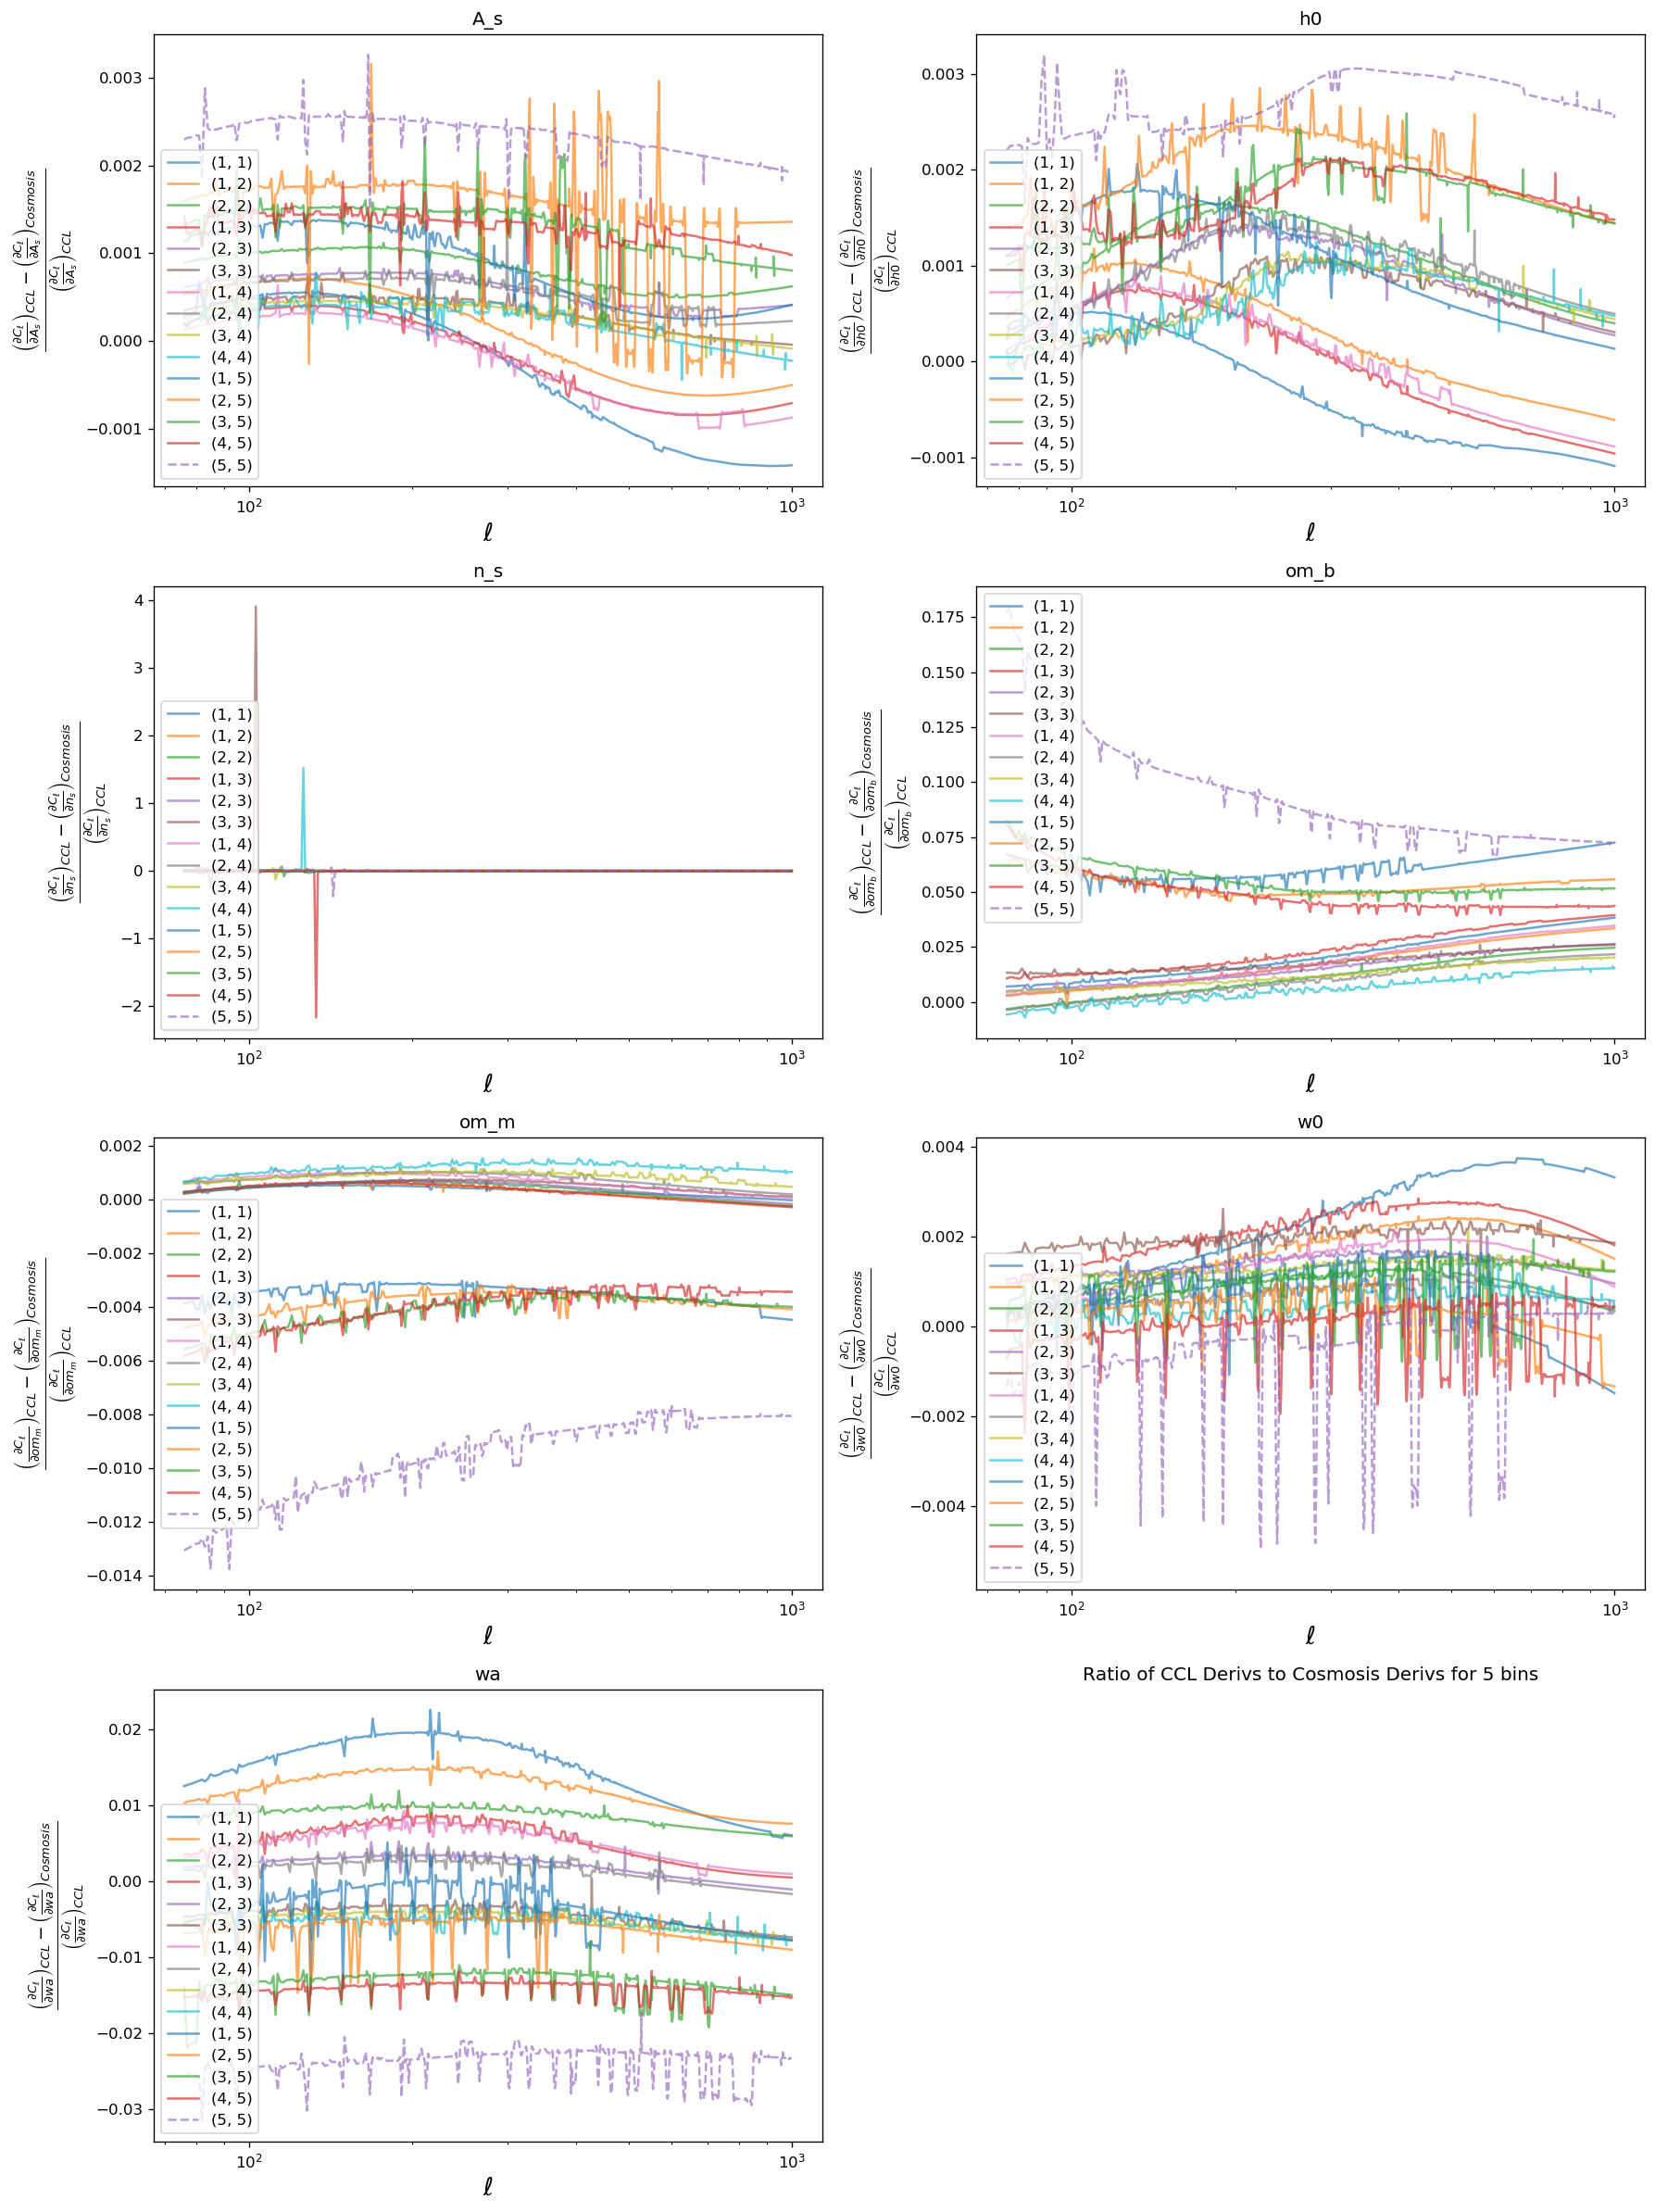

In [240]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20), dpi=120)
axes = axes.flatten()
plt.title("Ratio of CCL Derivs to Cosmosis Derivs for 5 bins")
for i in range(len(ccl_derivs)):
    for j in range(len(ccl_derivs[i][0])-1):
        linestyle = "--" if j == 14 else "-"
        axes[i].set_title("%s"%cosmosis_derivs_order[i][6:-13])
        axes[i].semilogx(ccl_derivs[i][:, 0], \
                          (ccl_derivs[i][:, j+1]-cosmosis_derivs[i][:, j+1])/ccl_derivs[i][:, j+1], \
                          alpha=0.65, \
                          label=orderings[j],
                          linestyle=linestyle)
    axes[i].legend()
    axes[i].set_xlabel(r'$\ell$', fontsize=16)
    axes[i].set_ylabel(r'$\frac{\left(\frac{\partial C_\ell}{\partial %s}\right)_{CCL} - \left(\frac{\partial C_\ell}{\partial %s}\right)_{Cosmosis}}{\left(\frac{\partial C_\ell}{\partial %s}\right)_{CCL}}$'%(cosmosis_derivs_order[i][6:-13], cosmosis_derivs_order[i][6:-13],cosmosis_derivs_order[i][6:-13]),
                       fontsize=16)

axes[-1].axis("off")    
plt.tight_layout()
plt.show()

### Focus on what is happening with n_s

In [53]:
import pandas as pd

In [88]:
ccl_ns_deriv = pd.DataFrame(ccl_derivs[2][:, 1:], index=ccl_derivs[2][:, 0], columns=["ccl %d,%d"%(i[0], i[1]) for i in orderings])
cosmosis_ns_deriv = pd.DataFrame(cosmosis_derivs[2][:, 1:], index=cosmosis_derivs[2][:, 0], columns=["cosmosis %d,%d"%(i[0], i[1]) for i in orderings])

In [121]:
axes = (ccl_ns_deriv).plot(subplots=True, 
                           figsize=(15,20), 
                           alpha=0.5, 
                           logx=True, 
                           layout=(5,3), 
                           title="CCL vs Cosmosis n_s Derivative")
cosmosis_ns_deriv.plot(ax=axes, 
                       subplots=True, 
                       linestyle='--', 
                       alpha=0.5, 
                       logx=True, 
                       layout=(5,3))
fig = plt.gcf()
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/numpy/ma/core.py:6717: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:195: UserWarning: When passing multiple axes, layout keyword is ignored
  UserWarning,


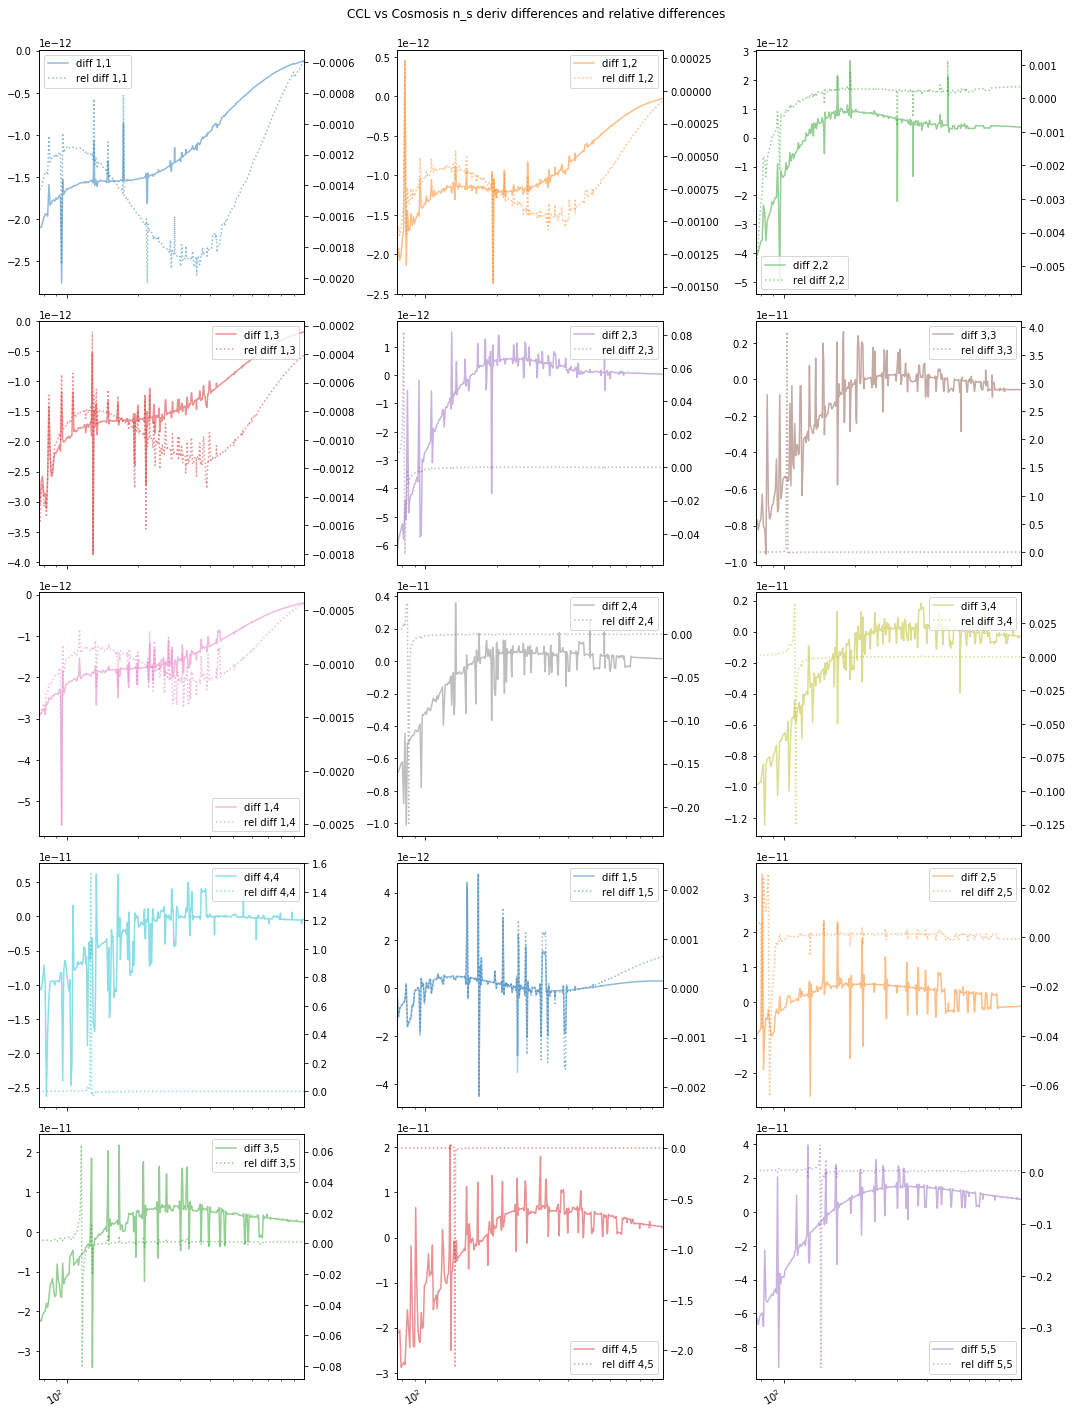

In [134]:
axes = (ccl_ns_deriv.rename(columns={"ccl %d,%d"%(i[0], i[1]): i for i in orderings}) - 
        cosmosis_ns_deriv.rename(columns={"cosmosis %d,%d"%(i[0], i[1]): i for i in orderings}))\
        .rename(columns={i: "diff %d,%d"%(i[0], i[1]) for i in orderings})\
        .plot(subplots=True,
              figsize=(15,20),
              linestyle='-', 
              alpha=0.5, 
              logx=True, 
              layout=(5,3),
              title="CCL vs Cosmosis n_s deriv differences and relative differences",
              label="diff",
              legend=False
            )
h1_l1_s = [ax.get_legend_handles_labels() for ax in axes.flatten()]
axes2 = ((ccl_ns_deriv.rename(columns={"ccl %d,%d"%(i[0], i[1]): i for i in orderings}) - 
 cosmosis_ns_deriv.rename(columns={"cosmosis %d,%d"%(i[0], i[1]): i for i in orderings}))/ccl_ns_deriv.values)\
        .rename(columns={i: "rel diff %d,%d"%(i[0], i[1]) for i in orderings})\
        .plot(ax=axes,
              subplots=True, 
              linestyle=':',
#               color='k',
              alpha=0.5, 
              logx=True, 
              layout=(5,3),
              secondary_y=True,
              label="rel diff")
for i, ax in enumerate(axes.flatten()):
    h1, l1 = h1_l1_s[i]
    h2, l2 = axes2.flatten()[i].get_legend_handles_labels()
    axes2.flatten()[i].legend(h1+h2, l1+l2,)
fig = plt.gcf()
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Comparison of Fisher Matrices

In [33]:
import seaborn as sns

In [179]:
f_ccl = np.loadtxt("fisher_out.dat")
f_cosmosis = np.loadtxt("fisher_out_cosmosis.dat")

In [235]:
fig, ax = plt.subplots(figsize=(10,8), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((f_ccl - f_cosmosis)/f_ccl, 
            annot=True, 
            cmap="YlGnBu",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Relative Difference in Fisher Matrix Entries for CCL and Cosmosis")
plt.show()

## Comparison of Fisher Matrices With Priors

In [31]:
f_ccl = np.loadtxt("fisher_with_priors_out.dat")
f_cosmosis = np.loadtxt("ccl_cosmosis_deriv_comparison/fisher_out_with_priors_cosmosis.dat")

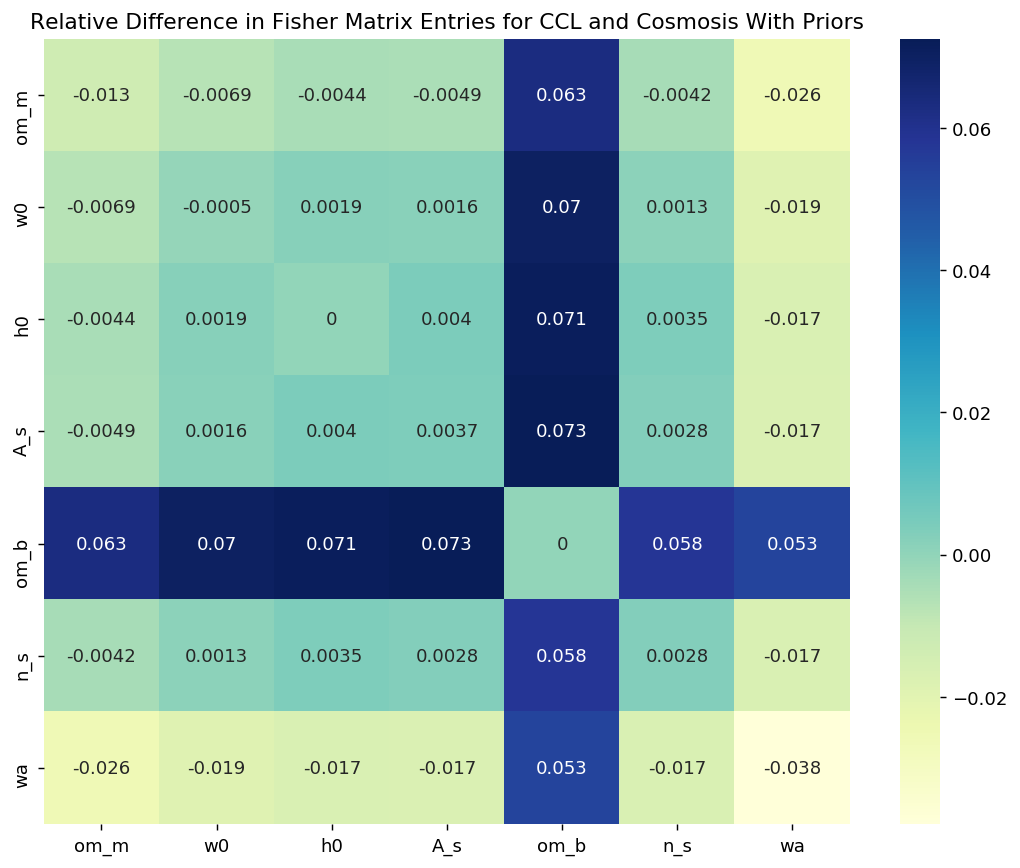

In [36]:
fig, ax = plt.subplots(figsize=(10,8), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((f_ccl - f_cosmosis)/f_ccl, 
            annot=True, 
            cmap="YlGnBu",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Relative Difference in Fisher Matrix Entries for CCL and Cosmosis With Priors")
plt.show()

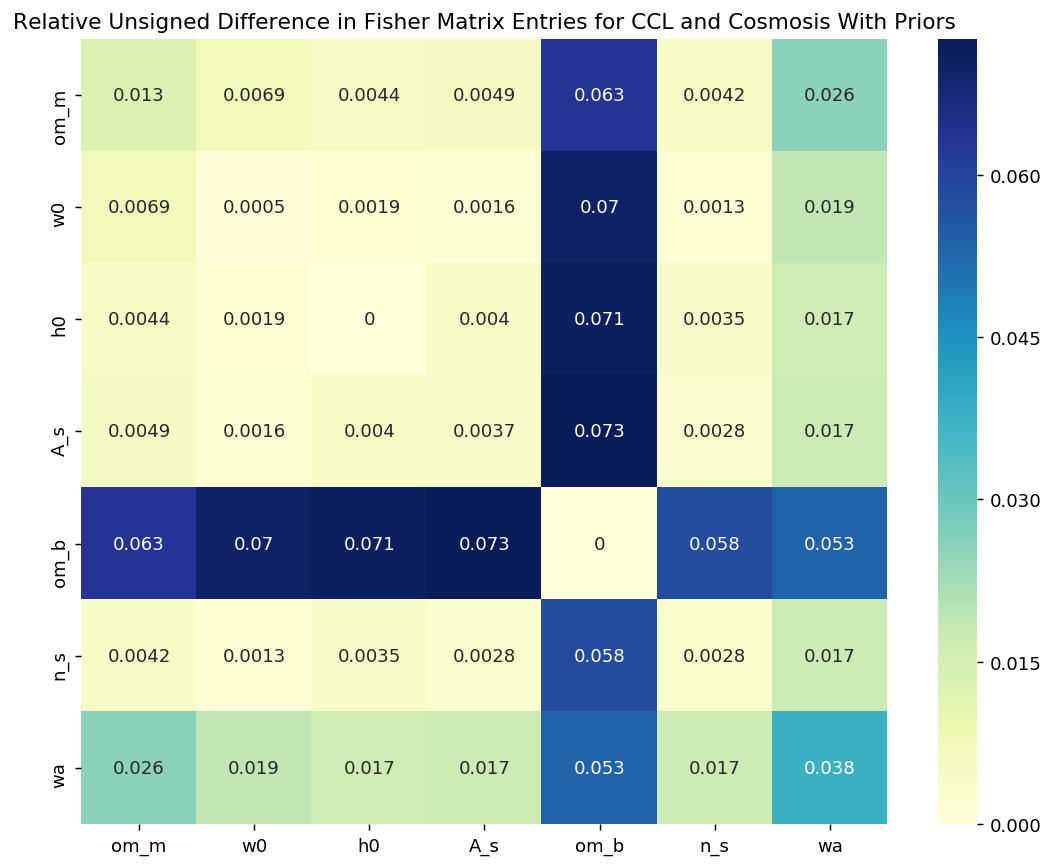

In [44]:
fig, ax = plt.subplots(figsize=(10,8), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap(abs(f_ccl - f_cosmosis)/abs(f_ccl), 
            annot=True, 
            cmap="YlGnBu",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Relative Unsigned Difference in Fisher Matrix Entries for CCL and Cosmosis With Priors")
plt.show()

# Checking if binning before or after calculating derivative matters

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
nbins = 5
orderings = [(i, j) for j in range(1, nbins+1) for i in range(1, j+1)]

In [12]:
binned_before = sorted([i for i in os.listdir(".") if i.find("deriv_")== 0 and i.find("binned") < 0])
binned_after  = sorted([i for i in os.listdir(".") if i.find("deriv_")== 0 and i.find("binned") >= 0])

In [27]:
paras = [i[6:-16] for i in binned_before]

In [15]:
binned_deriv_before = [np.loadtxt(i) for i in binned_before]
binned_deriv_after = [np.loadtxt(i) for i in binned_after]

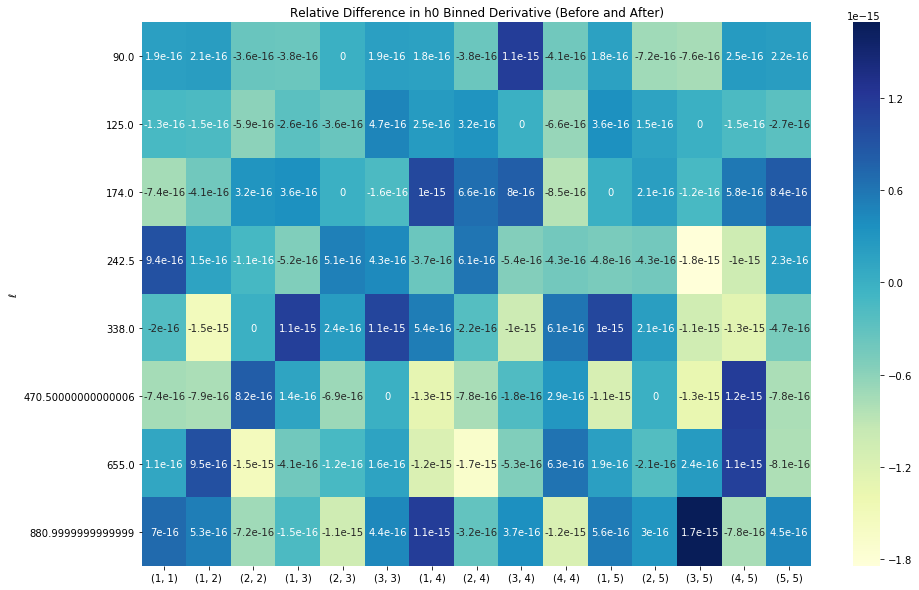

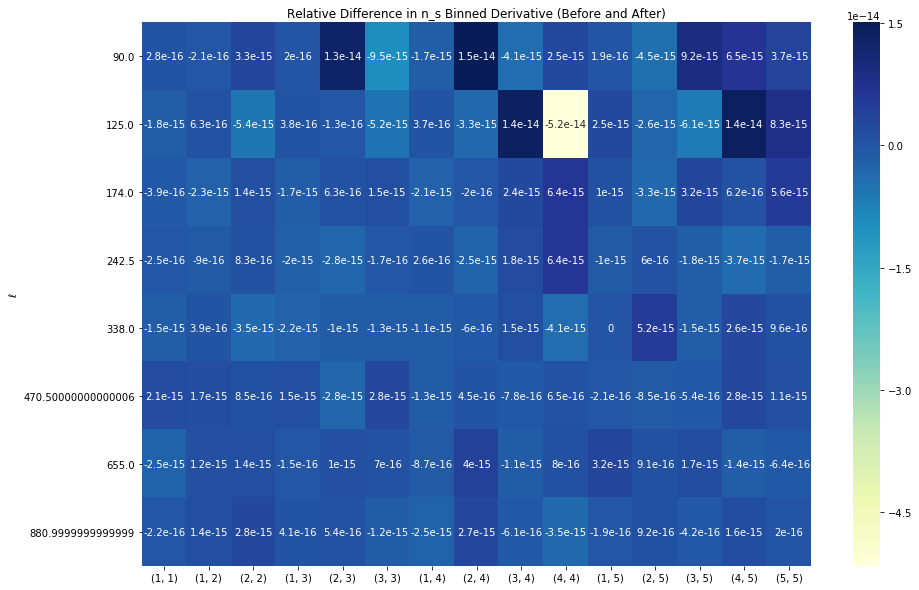

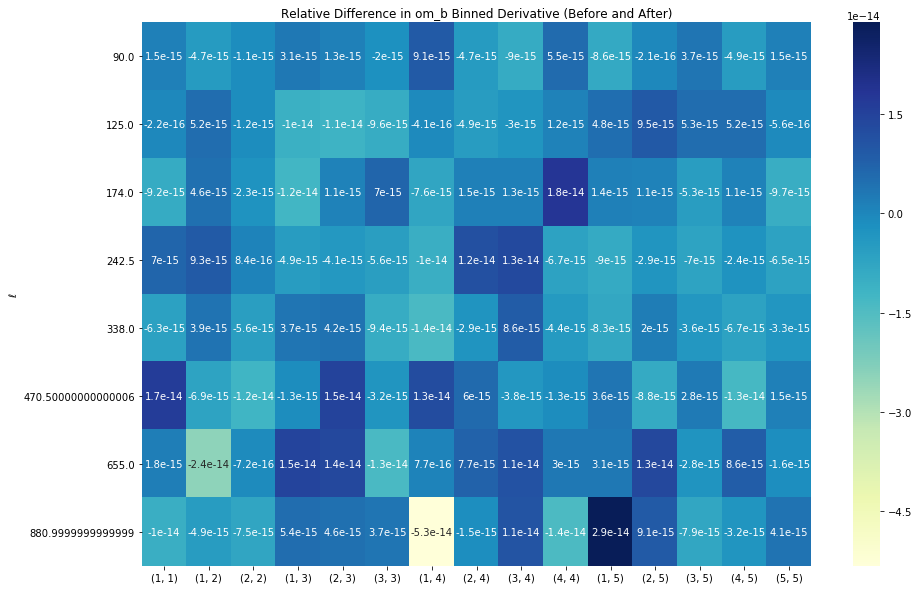

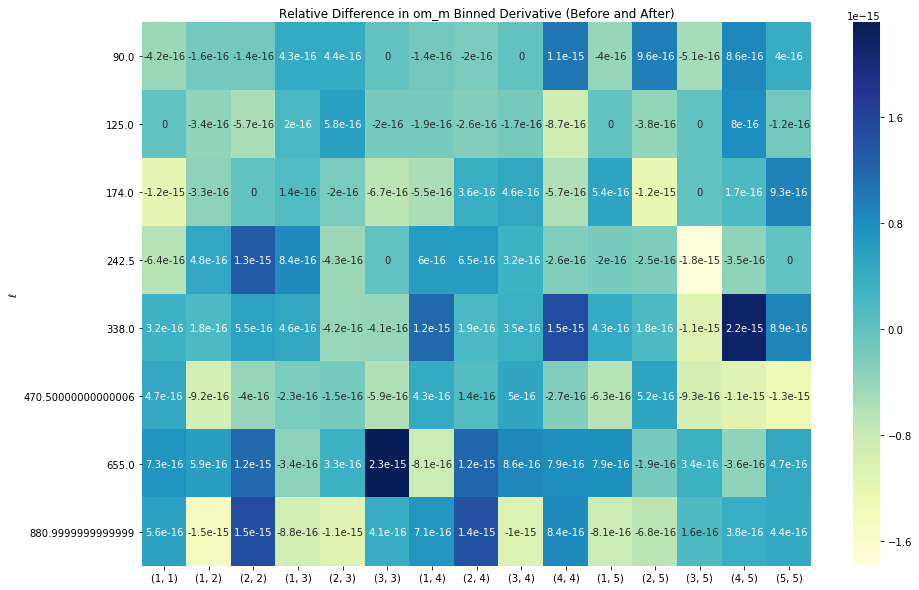

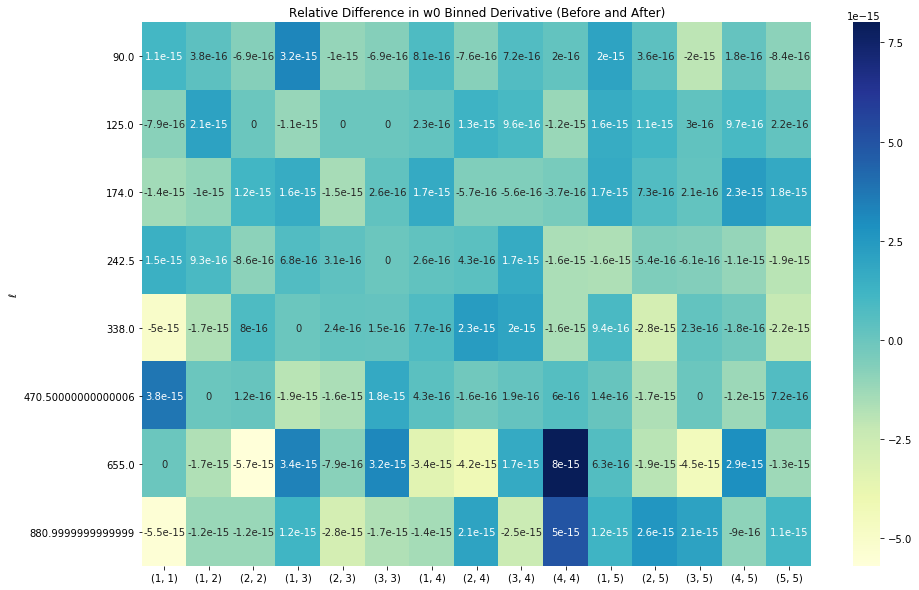

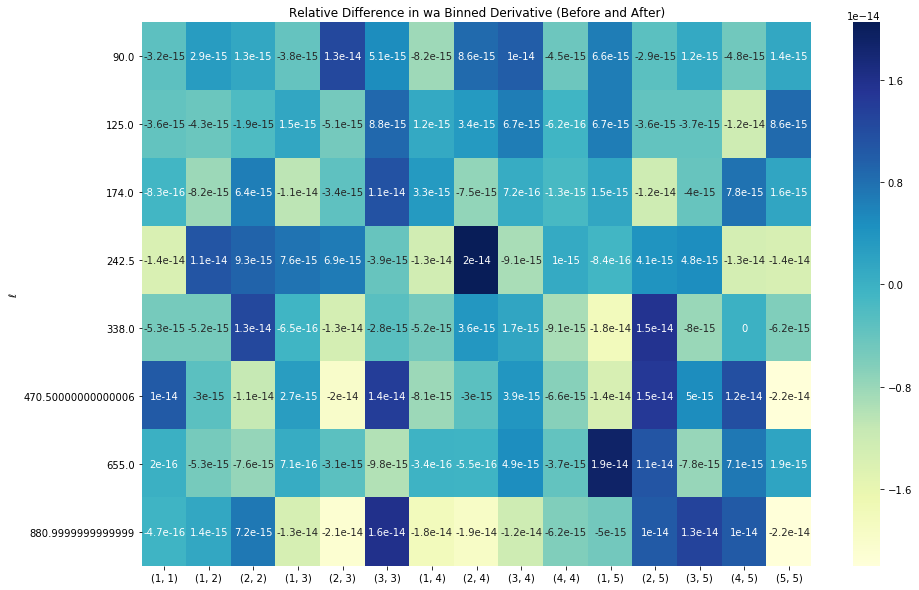

In [58]:
for i, para in enumerate(paras):
    df_before = pd.DataFrame(binned_deriv_before[i][:, 1:], index=binned_deriv_before[i][:, 0], columns=orderings)
    df_after = pd.DataFrame(binned_deriv_after[i][:, 1:], index=binned_deriv_before[i][:, 0], columns=orderings)
    diff = (df_after-df_before)/abs(df_before)
    plt.figure(figsize = (15,10))
    sns.heatmap(diff, annot=True, cmap="YlGnBu",)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Relative Difference in %s Binned Derivative (Before and After)"%para)
    plt.ylabel(r'$\ell$')
    plt.show()

According to these plots, it doesn't make a difference whether we bin first and then calculate derivatives or calculate derivatives and then bin them, the relative differences are very tiny: $\sim  10^{-16} - 10^{-14}$

# Check C_ells vs binned C_ells

In [59]:
c_ells = np.loadtxt("Cl_fid.dat")
binned_c_ells = np.loadtxt("Cl_fid_binned.dat")

In [60]:
c_ells = pd.DataFrame(c_ells[:, 1:], index=c_ells[:, 0], columns=orderings)
binned_c_ells = pd.DataFrame(binned_c_ells[:, 1:], index=binned_c_ells[:, 0], columns=orderings)

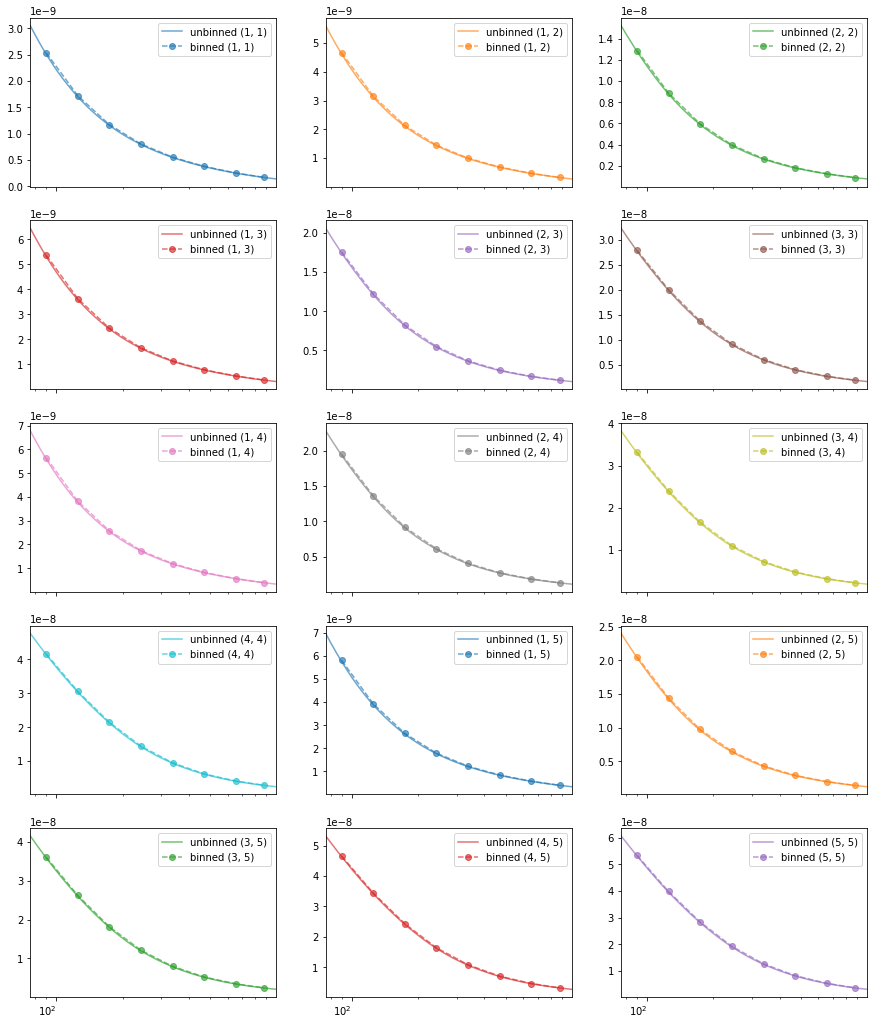

In [79]:
axes = c_ells.plot(subplots=True, layout=(5,3), figsize=(15,20), label="unbinned" , alpha=0.65, logx=True)
axes2 = binned_c_ells.plot(ax=axes, subplots=True, linestyle='--', marker='o', alpha=0.65, logx=True, label="binned")
for i, ax in enumerate(axes.flatten()):
    ax.legend(["unbinned (%d, %d)"%orderings[i], "binned (%d, %d)"%orderings[i]])

# Binned Fisher Matrices

### Load cosmosis data (with extrapolate power)

In [3]:
root_dir = "ccl_cosmosis_binned_comparison/out_cosmosis_extrapolate_power/"
cosmosis_ep_binned_fisher = np.loadtxt(root_dir+ "fisher_out.dat")
cosmosis_ep_binned_fisher_priors = np.loadtxt(root_dir+ "fisher_out_with_priors.dat")
cosmosis_ep_fom_om_m_A_s = np.loadtxt(root_dir+ "fom_om_m_A_s.dat")
cosmosis_ep_fom_w0_wa = np.loadtxt(root_dir+ "fom_w0_wa.dat")
cosmosis_ep_fom_om_m_A_s_priors = np.loadtxt(root_dir+ "fom_om_m_A_s_priors.dat")
cosmosis_ep_fom_w0_wa_priors = np.loadtxt(root_dir+ "fom_w0_wa_priors.dat")
cosmosis_ep_c_ells = np.loadtxt(root_dir+ "Cl_fid_unbinned.dat")
cosmosis_ep_c_ells_binned = np.loadtxt(root_dir+ "Cl_fid.dat")

### Load cosmosis data (without extrapolate power)

In [4]:
root_dir = "ccl_cosmosis_binned_comparison/out_cosmosis_no_extrapolate_power/"
cosmosis_no_ep_binned_fisher = np.loadtxt(root_dir + "fisher_out.dat")
cosmosis_no_ep_binned_fisher_priors = np.loadtxt(root_dir + "fisher_out_with_priors.dat")
cosmosis_no_ep_fom_om_m_A_s = np.loadtxt(root_dir + "fom_om_m_A_s.dat")
cosmosis_no_ep_fom_w0_wa = np.loadtxt(root_dir + "fom_w0_wa.dat")
cosmosis_no_ep_fom_om_m_A_s_priors = np.loadtxt(root_dir + "fom_om_m_A_s_priors.dat")
cosmosis_no_ep_fom_w0_wa_priors = np.loadtxt(root_dir + "fom_w0_wa_priors.dat")
cosmosis_no_ep_c_ells = np.loadtxt(root_dir + "Cl_fid_unbinned.dat")
cosmosis_no_ep_c_ells_binned = np.loadtxt(root_dir + "Cl_fid.dat")

### Load CCL data

In [5]:
ccl_binned_fisher = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/fisher_out.dat")
ccl_binned_fisher_priors = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/fisher_out_with_priors.dat")
ccl_fom_om_m_A_s = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/fom_om_m_A_s.dat")
ccl_fom_w0_wa = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/fom_w0_wa.dat")
ccl_fom_om_m_A_s_priors = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/fom_om_m_A_s_priors.dat")
ccl_fom_w0_wa_priors = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/fom_w0_wa_priors.dat")
ccl_c_ells = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/Cl_fid.dat")
ccl_c_ells_binned = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/Cl_fid_binned.dat")

## Figures of Merit

### FoM for $w_0$ $w_a$

#### No Priors

In [5]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_w0_wa),
print("Cosmosis without Extrapolate Power", cosmosis_no_ep_fom_w0_wa),
print("CCL", ccl_fom_w0_wa)
print("Relative Difference without EP", (cosmosis_no_ep_fom_w0_wa - ccl_fom_w0_wa)/ccl_fom_w0_wa)

Cosmosis with Extrapolate Power 31.440497338580617
Cosmosis without Extrapolate Power 31.5562178703747
CCL 28.017723451716254
Relative Difference without EP 0.12629485849399696


#### With Priors

In [6]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_w0_wa_priors),
print("Cosmosis without Extrapolate Power", cosmosis_no_ep_fom_w0_wa_priors),
print("CCL", ccl_fom_w0_wa_priors)
print("Relative Difference without EP", (cosmosis_no_ep_fom_w0_wa_priors - ccl_fom_w0_wa_priors)/ccl_fom_w0_wa_priors)

Cosmosis with Extrapolate Power 61.756851826581006
Cosmosis without Extrapolate Power 61.8417663320266
CCL 45.00610504838222
Relative Difference without EP 0.37407505638503497


### FoM for $\Omega_m$ $A_s$

#### No Priors

In [7]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_om_m_A_s),
print("Cosmosis without Extrapolate Power", cosmosis_no_ep_fom_om_m_A_s),
print("CCL", ccl_fom_om_m_A_s)
print("Relative Difference without EP", (cosmosis_no_ep_fom_om_m_A_s - ccl_fom_om_m_A_s)/ccl_fom_om_m_A_s)

Cosmosis with Extrapolate Power 181137264858.99826
Cosmosis without Extrapolate Power 181456296712.26328
CCL 101880468678.9967
Relative Difference without EP 0.7810704943259809


#### With Priors

In [8]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_om_m_A_s_priors),
print("Cosmosis without Extrapolate Power", cosmosis_no_ep_fom_om_m_A_s_priors),
print("CCL", ccl_fom_om_m_A_s_priors)
print("Relative Difference without EP", (cosmosis_no_ep_fom_om_m_A_s_priors - ccl_fom_om_m_A_s_priors)/ccl_fom_om_m_A_s_priors)

Cosmosis with Extrapolate Power 947758018270.0127
Cosmosis without Extrapolate Power 948390799116.0254
CCL 817775779062.2489
Relative Difference without EP 0.15971984423842187


## Plot the Differences in Fisher Matrix Values

In [6]:
print("CCL Fisher Matrix")
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
pd.DataFrame(ccl_binned_fisher, index=paras, columns=paras)

CCL Fisher Matrix


om_m            w0            h0           A_s          om_b  \
om_m  1.114350e+07 -1.186152e+06  4.965934e+06  7.732860e+14 -7.217449e+06   
w0   -1.186152e+06  1.276091e+05 -5.310571e+05 -8.281517e+13  7.777608e+05   
h0    4.965934e+06 -5.310571e+05  2.225566e+06  3.463584e+14 -3.263840e+06   
A_s   7.732860e+14 -8.281517e+13  3.463584e+14  5.401995e+22 -5.071914e+14   
om_b -7.217449e+06  7.777608e+05 -3.263840e+06 -5.071914e+14  4.856436e+06   
n_s   1.367834e+06 -1.429099e+05  6.081469e+05  9.404375e+13 -8.797783e+05   
wa   -3.832656e+05  4.131226e+04 -1.722500e+05 -2.686483e+13  2.536898e+05   

               n_s            wa  
om_m  1.367834e+06 -3.832656e+05  
w0   -1.429099e+05  4.131226e+04  
h0    6.081469e+05 -1.722500e+05  
A_s   9.404375e+13 -2.686483e+13  
om_b -8.797783e+05  2.536898e+05  
n_s   1.787618e+05 -4.617507e+04  
wa   -4.617507e+04  1.342033e+04

CCL Fisher Matrix with $A_s$ row and column scaled by $10^9$

In [8]:
iden = np.identity(len(ccl_binned_fisher))
iden[3,3] = 10e-9
ccl_binned_fisher_scaled = np.dot(iden,np.dot(ccl_binned_fisher, iden))
pd.DataFrame(ccl_binned_fisher_scaled, index=paras, columns=paras)

om_m            w0            h0           A_s          om_b  \
om_m  1.114350e+07 -1.186152e+06  4.965934e+06  7.732860e+06 -7.217449e+06   
w0   -1.186152e+06  1.276091e+05 -5.310571e+05 -8.281517e+05  7.777608e+05   
h0    4.965934e+06 -5.310571e+05  2.225566e+06  3.463584e+06 -3.263840e+06   
A_s   7.732860e+06 -8.281517e+05  3.463584e+06  5.401995e+06 -5.071914e+06   
om_b -7.217449e+06  7.777608e+05 -3.263840e+06 -5.071914e+06  4.856436e+06   
n_s   1.367834e+06 -1.429099e+05  6.081469e+05  9.404375e+05 -8.797783e+05   
wa   -3.832656e+05  4.131226e+04 -1.722500e+05 -2.686483e+05  2.536898e+05   

               n_s             wa  
om_m  1.367834e+06 -383265.634358  
w0   -1.429099e+05   41312.262120  
h0    6.081469e+05 -172250.039991  
A_s   9.404375e+05 -268648.277501  
om_b -8.797783e+05  253689.811924  
n_s   1.787618e+05  -46175.073413  
wa   -4.617507e+04   13420.334294

In [10]:
print("Cosmosis without Extrapolate Power Fisher Matrix")
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
pd.DataFrame(cosmosis_no_ep_binned_fisher, index=paras, columns=paras)

Cosmosis without Extrapolate Power Fisher Matrix


om_m            w0            h0           A_s          om_b  \
om_m  1.116641e+07 -1.186838e+06  4.971734e+06  7.744842e+14 -7.056914e+06   
w0   -1.186838e+06  1.275022e+05 -5.308588e+05 -8.281616e+13  7.596276e+05   
h0    4.971734e+06 -5.308588e+05  2.225824e+06  3.465348e+14 -3.186929e+06   
A_s   7.744842e+14 -8.281616e+13  3.465348e+14  5.406751e+22 -4.954062e+14   
om_b -7.056914e+06  7.596276e+05 -3.186929e+06 -4.954062e+14  4.630698e+06   
n_s   1.370259e+06 -1.429490e+05  6.087252e+05  9.416825e+13 -8.596032e+05   
wa   -3.841392e+05  4.136813e+04 -1.725908e+05 -2.692745e+13  2.484894e+05   

               n_s            wa  
om_m  1.370259e+06 -3.841392e+05  
w0   -1.429490e+05  4.136813e+04  
h0    6.087252e+05 -1.725908e+05  
A_s   9.416825e+13 -2.692745e+13  
om_b -8.596032e+05  2.484894e+05  
n_s   1.790533e+05 -4.623443e+04  
wa   -4.623443e+04  1.348548e+04

In [11]:
cosmosis_no_ep_binned_fisher_scaled = np.dot(iden,np.dot(cosmosis_no_ep_binned_fisher, iden))
pd.DataFrame(cosmosis_no_ep_binned_fisher_scaled, index=paras, columns=paras)

om_m            w0            h0           A_s          om_b  \
om_m  1.116641e+07 -1.186838e+06  4.971734e+06  7.744842e+06 -7.056914e+06   
w0   -1.186838e+06  1.275022e+05 -5.308588e+05 -8.281616e+05  7.596276e+05   
h0    4.971734e+06 -5.308588e+05  2.225824e+06  3.465348e+06 -3.186929e+06   
A_s   7.744842e+06 -8.281616e+05  3.465348e+06  5.406751e+06 -4.954062e+06   
om_b -7.056914e+06  7.596276e+05 -3.186929e+06 -4.954062e+06  4.630698e+06   
n_s   1.370259e+06 -1.429490e+05  6.087252e+05  9.416825e+05 -8.596032e+05   
wa   -3.841392e+05  4.136813e+04 -1.725908e+05 -2.692745e+05  2.484894e+05   

               n_s             wa  
om_m  1.370259e+06 -384139.162448  
w0   -1.429490e+05   41368.134700  
h0    6.087252e+05 -172590.763211  
A_s   9.416825e+05 -269274.540075  
om_b -8.596032e+05  248489.403774  
n_s   1.790533e+05  -46234.430815  
wa   -4.623443e+04   13485.478304

In [12]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_no_ep_binned_fisher - ccl_binned_fisher)/abs(ccl_binned_fisher), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for CCL and Cosmosis (w/out extrapolate power) w/out Priors")
plt.show()

In [13]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_no_ep_binned_fisher_priors - ccl_binned_fisher_priors)/abs(ccl_binned_fisher_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for CCL and Cosmosis (w/out extrapolate power) w/ Priors")
plt.show()

In [12]:
print("Cosmosis with Extrapolate Power Fisher Matrix")
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
pd.DataFrame(cosmosis_ep_binned_fisher, index=paras, columns=paras)

Cosmosis with Extrapolate Power Fisher Matrix


om_m            w0            h0           A_s          om_b  \
om_m  1.116656e+07 -1.186852e+06  4.971792e+06  7.744924e+14 -7.057011e+06   
w0   -1.186852e+06  1.275033e+05 -5.308653e+05 -8.281706e+13  7.596441e+05   
h0    4.971792e+06 -5.308653e+05  2.225847e+06  3.465381e+14 -3.186966e+06   
A_s   7.744924e+14 -8.281706e+13  3.465381e+14  5.406802e+22 -4.954124e+14   
om_b -7.057011e+06  7.596441e+05 -3.186966e+06 -4.954124e+14  4.630764e+06   
n_s   1.370270e+06 -1.429503e+05  6.087294e+05  9.416870e+13 -8.596017e+05   
wa   -3.841361e+05  4.136777e+04 -1.725891e+05 -2.692720e+13  2.484876e+05   

               n_s            wa  
om_m  1.370270e+06 -3.841361e+05  
w0   -1.429503e+05  4.136777e+04  
h0    6.087294e+05 -1.725891e+05  
A_s   9.416870e+13 -2.692720e+13  
om_b -8.596017e+05  2.484876e+05  
n_s   1.790536e+05 -4.623379e+04  
wa   -4.623379e+04  1.348506e+04

CCL Fisher Matrix with $A_s$ row and column scaled by $10^9$ (The A_s labels are wrong)

In [13]:
cosmosis_ep_binned_fisher_scaled = np.dot(iden,np.dot(cosmosis_ep_binned_fisher, iden))
pd.DataFrame(cosmosis_ep_binned_fisher_scaled, index=paras, columns=paras)

om_m            w0            h0           A_s          om_b  \
om_m  1.116656e+07 -1.186852e+06  4.971792e+06  7.744924e+06 -7.057011e+06   
w0   -1.186852e+06  1.275033e+05 -5.308653e+05 -8.281706e+05  7.596441e+05   
h0    4.971792e+06 -5.308653e+05  2.225847e+06  3.465381e+06 -3.186966e+06   
A_s   7.744924e+06 -8.281706e+05  3.465381e+06  5.406802e+06 -4.954124e+06   
om_b -7.057011e+06  7.596441e+05 -3.186966e+06 -4.954124e+06  4.630764e+06   
n_s   1.370270e+06 -1.429503e+05  6.087294e+05  9.416870e+05 -8.596017e+05   
wa   -3.841361e+05  4.136777e+04 -1.725891e+05 -2.692720e+05  2.484876e+05   

               n_s             wa  
om_m  1.370270e+06 -384136.075060  
w0   -1.429503e+05   41367.770570  
h0    6.087294e+05 -172589.062280  
A_s   9.416870e+05 -269271.973713  
om_b -8.596017e+05  248487.629597  
n_s   1.790536e+05  -46233.790453  
wa   -4.623379e+04   13485.062865

Now we look at the relative differences between the fisher matrices  in two cases:
1. Without scaling the A_s rows and column
2. With scaling the A_s row and column

They are essentially the same

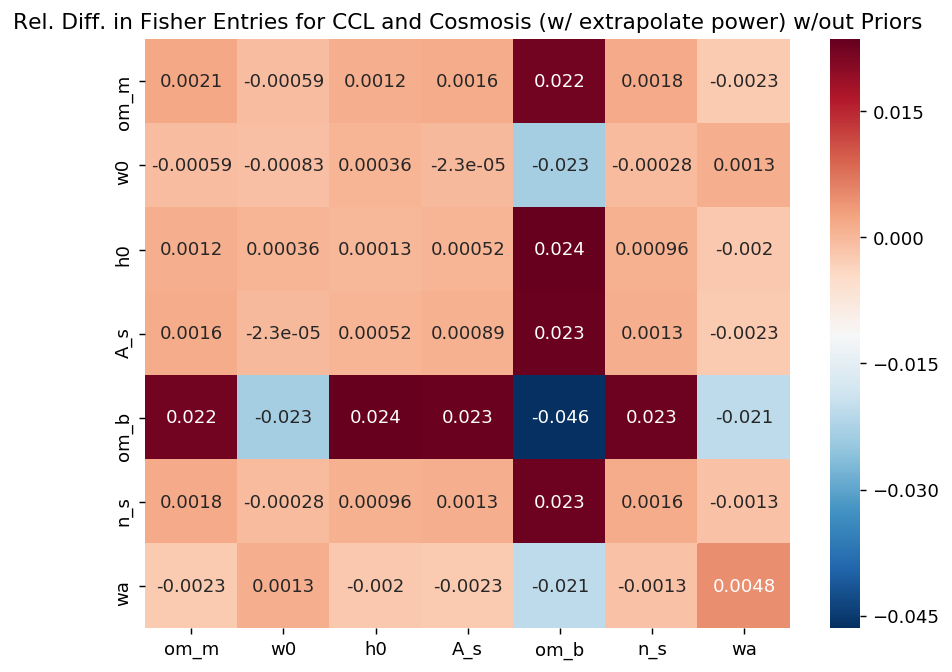

In [15]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher - ccl_binned_fisher)/abs(ccl_binned_fisher), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for CCL and Cosmosis (w/ extrapolate power) w/out Priors")
plt.show()

In [30]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher_scaled - ccl_binned_fisher_scaled)/abs(ccl_binned_fisher_scaled), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Scaled Fisher Entries for CCL and Cosmosis (w/ extrapolate power) w/out Priors")
plt.show()

In [14]:
cosmosis_ep_binned_cov = np.linalg.inv(cosmosis_ep_binned_fisher)
cosmosis_ep_binned_cov_priors = np.linalg.inv(cosmosis_ep_binned_fisher_priors)
ccl_binned_cov = np.linalg.inv(ccl_binned_fisher)
ccl_binned_cov_priors = np.linalg.inv(ccl_binned_fisher_priors)

In [20]:
# cosmosis_ep_binned_cov_scaled = np.linalg.inv(cosmosis_ep_binned_fisher_scaled)
cosmosis_ep_binned_cov_scaled_priors = np.linalg.inv(cosmosis_ep_binned_fisher_priors_scaled)
# ccl_binned_cov_scaled = np.linalg.inv(ccl_binned_fisher_scaled)
ccl_binned_cov_scaled_priors = np.linalg.inv(ccl_binned_fisher_priors_scaled)

CCL Covariance Matrix with no scaling

In [52]:
pd.DataFrame(ccl_binned_cov, index=paras, columns=paras)

$\Omega_m$         $w_0$         $h_0$         $A_s$  \
$\Omega_m$  1.412516e-03  2.354988e-03 -5.685042e-03  2.999481e-12   
$w_0$       2.354988e-03  2.214834e-02 -3.213627e-03 -2.330046e-11   
$h_0$      -5.685042e-03 -3.213627e-03  2.585025e-02 -2.502212e-11   
$A_s$       2.999481e-12 -2.330046e-11 -2.502212e-11  7.457575e-20   
$\Omega_b$ -1.230410e-03 -1.413128e-04  5.707901e-03 -6.208574e-12   
$n_s$       3.580141e-04 -6.232853e-04 -2.200388e-03  2.980825e-12   
$w_a$      -9.382443e-03 -8.828787e-02  1.376516e-02  1.131334e-10   

              $\Omega_b$         $n_s$         $w_a$  
$\Omega_m$ -1.230410e-03  3.580141e-04 -9.382443e-03  
$w_0$      -1.413128e-04 -6.232853e-04 -8.828787e-02  
$h_0$       5.707901e-03 -2.200388e-03  1.376516e-02  
$A_s$      -6.208574e-12  2.980825e-12  1.131334e-10  
$\Omega_b$  1.306061e-03 -4.541683e-04 -1.227587e-04  
$n_s$      -4.541683e-04  4.561495e-04  2.286130e-05  
$w_a$      -1.227587e-04  2.286130e-05  4.094503e-01

CCL Covariance Matrix (Fisher $A_s$ row and column scaled by $10^9$)

In [44]:
pd.DataFrame(ccl_binned_cov_scaled, index=paras, columns=paras)

om_m        w0        h0  $10^9 A_s$      om_b       n_s  \
om_m        0.001413  0.002355 -0.005685    0.000300 -0.001230  0.000358   
w0          0.002355  0.022148 -0.003214   -0.002330 -0.000141 -0.000623   
h0         -0.005685 -0.003214  0.025850   -0.002502  0.005708 -0.002200   
$10^9 A_s$  0.000300 -0.002330 -0.002502    0.000746 -0.000621  0.000298   
om_b       -0.001230 -0.000141  0.005708   -0.000621  0.001306 -0.000454   
n_s         0.000358 -0.000623 -0.002200    0.000298 -0.000454  0.000456   
wa         -0.009382 -0.088288  0.013765    0.011313 -0.000123  0.000023   

                  wa  
om_m       -0.009382  
w0         -0.088288  
h0          0.013765  
$10^9 A_s$  0.011313  
om_b       -0.000123  
n_s         0.000023  
wa          0.409450

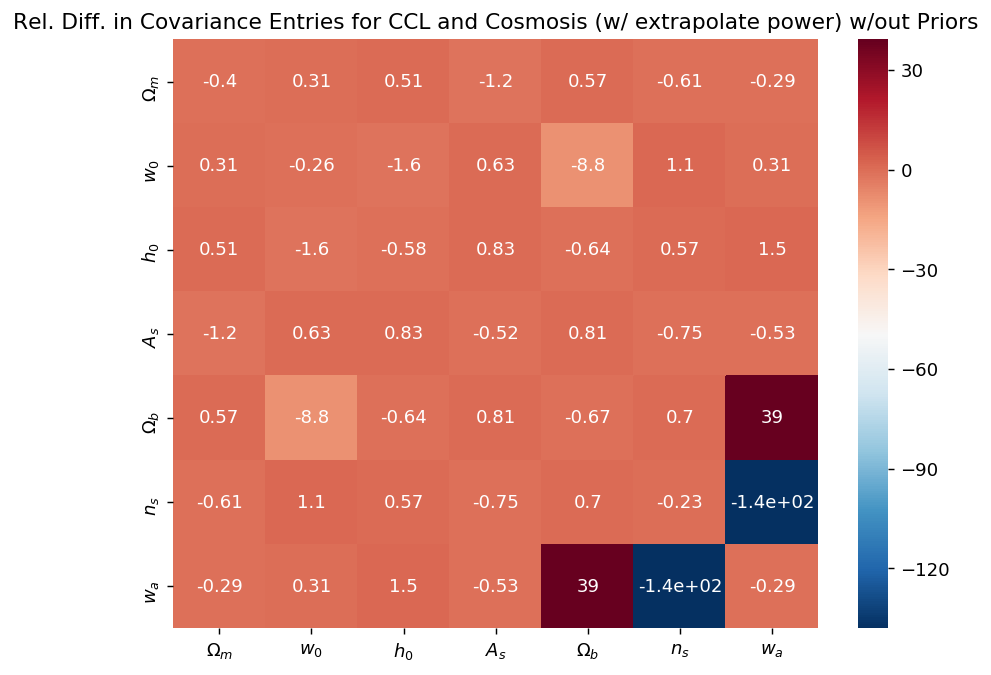

In [51]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["$\Omega_m$", "$w_0$", "$h_0$", "$A_s$", "$\Omega_b$", "$n_s$", "$w_a$"]
sns.heatmap((cosmosis_ep_binned_cov - ccl_binned_cov)/abs(ccl_binned_cov), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Covariance Entries for CCL and Cosmosis (w/ extrapolate power) w/out Priors")
plt.savefig("plots/rel_diff_cov_CCL_Cosmosis_ep.png")
plt.show()

In [49]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["$\Omega_m$", "$w_0$", "$h_0$", "$10^9 A_s$", "$\Omega_b$", "$n_s$", "$w_a$"]
sns.heatmap((cosmosis_ep_binned_cov_scaled - ccl_binned_cov_scaled)/abs(ccl_binned_cov_scaled), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Scaled Covariance Entries for \nCCL and Cosmosis (w/ extrapolate power) w/out Priors")
# plt.savefig("plots/rel_diff_cov_CCL_Cosmosis_ep.png")
plt.show()

#### Now with priors

In [16]:
print("CCL Fisher Matrix with priors")
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
pd.DataFrame(ccl_binned_fisher_priors, index=paras, columns=paras)

CCL Fisher Matrix with priors


om_m            w0            h0           A_s          om_b  \
om_m  1.114350e+07 -1.186152e+06  4.965934e+06  7.732860e+14 -7.217449e+06   
w0   -1.186152e+06  1.276091e+05 -5.310571e+05 -8.281517e+13  7.777608e+05   
h0    4.965934e+06 -5.310571e+05  2.256344e+06  3.463584e+14 -3.263840e+06   
A_s   7.732860e+14 -8.281517e+13  3.463584e+14  5.401995e+22 -5.071914e+14   
om_b -7.217449e+06  7.777608e+05 -3.263840e+06 -5.071914e+14  7.152120e+06   
n_s   1.367834e+06 -1.429099e+05  6.081469e+05  9.404375e+13 -8.797783e+05   
wa   -3.832656e+05  4.131226e+04 -1.722500e+05 -2.686483e+13  2.536898e+05   

               n_s            wa  
om_m  1.367834e+06 -3.832656e+05  
w0   -1.429099e+05  4.131226e+04  
h0    6.081469e+05 -1.722500e+05  
A_s   9.404375e+13 -2.686483e+13  
om_b -8.797783e+05  2.536898e+05  
n_s   1.787618e+05 -4.617507e+04  
wa   -4.617507e+04  1.342033e+04

In [17]:
iden = np.identity(len(ccl_binned_fisher_priors))
iden[3,3] = 10e-9
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
ccl_binned_fisher_priors_scaled = np.dot(iden,np.dot(ccl_binned_fisher_priors, iden))
print("CCL Fisher Matrix With Priors, A_s row and column scaled by 10^9")
pd.DataFrame(ccl_binned_fisher_priors_scaled, index=paras, columns=paras)

CCL Fisher Matrix With Priors, A_s row and column scaled by 10^9


om_m            w0            h0    $10^9 A_s$  \
om_m        1.114350e+07 -1.186152e+06  4.965934e+06  7.732860e+06   
w0         -1.186152e+06  1.276091e+05 -5.310571e+05 -8.281517e+05   
h0          4.965934e+06 -5.310571e+05  2.256344e+06  3.463584e+06   
$10^9 A_s$  7.732860e+06 -8.281517e+05  3.463584e+06  5.401995e+06   
om_b       -7.217449e+06  7.777608e+05 -3.263840e+06 -5.071914e+06   
n_s         1.367834e+06 -1.429099e+05  6.081469e+05  9.404375e+05   
wa         -3.832656e+05  4.131226e+04 -1.722500e+05 -2.686483e+05   

                    om_b           n_s             wa  
om_m       -7.217449e+06  1.367834e+06 -383265.634358  
w0          7.777608e+05 -1.429099e+05   41312.262120  
h0         -3.263840e+06  6.081469e+05 -172250.039991  
$10^9 A_s$ -5.071914e+06  9.404375e+05 -268648.277501  
om_b        7.152120e+06 -8.797783e+05  253689.811924  
n_s        -8.797783e+05  1.787618e+05  -46175.073413  
wa          2.536898e+05 -4.617507e+04   13420.334294

In [18]:
print("Cosmosis Fisher Matrix with priors")
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
pd.DataFrame(cosmosis_ep_binned_fisher_priors, index=paras, columns=paras)

Cosmosis Fisher Matrix with priors


om_m            w0            h0           A_s          om_b  \
om_m  1.116656e+07 -1.186852e+06  4.971792e+06  7.744924e+14 -7.057011e+06   
w0   -1.186852e+06  1.275033e+05 -5.308653e+05 -8.281706e+13  7.596441e+05   
h0    4.971792e+06 -5.308653e+05  2.256625e+06  3.465381e+14 -3.186966e+06   
A_s   7.744924e+14 -8.281706e+13  3.465381e+14  5.406802e+22 -4.954124e+14   
om_b -7.057011e+06  7.596441e+05 -3.186966e+06 -4.954124e+14  6.926448e+06   
n_s   1.370270e+06 -1.429503e+05  6.087294e+05  9.416870e+13 -8.596017e+05   
wa   -3.841361e+05  4.136777e+04 -1.725891e+05 -2.692720e+13  2.484876e+05   

               n_s            wa  
om_m  1.370270e+06 -3.841361e+05  
w0   -1.429503e+05  4.136777e+04  
h0    6.087294e+05 -1.725891e+05  
A_s   9.416870e+13 -2.692720e+13  
om_b -8.596017e+05  2.484876e+05  
n_s   1.790536e+05 -4.623379e+04  
wa   -4.623379e+04  1.348506e+04

In [19]:
iden = np.identity(len(cosmosis_ep_binned_fisher_priors))
iden[3,3] = 10e-9
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
cosmosis_ep_binned_fisher_priors_scaled = np.dot(iden,np.dot(cosmosis_ep_binned_fisher_priors, iden))
print("Cosmosis Fisher Matrix With Priors, A_s row and column scaled by 10^9")
pd.DataFrame(cosmosis_ep_binned_fisher_priors_scaled, index=paras, columns=paras)

Cosmosis Fisher Matrix With Priors, A_s row and column scaled by 10^9


om_m            w0            h0    $10^9 A_s$  \
om_m        1.116656e+07 -1.186852e+06  4.971792e+06  7.744924e+06   
w0         -1.186852e+06  1.275033e+05 -5.308653e+05 -8.281706e+05   
h0          4.971792e+06 -5.308653e+05  2.256625e+06  3.465381e+06   
$10^9 A_s$  7.744924e+06 -8.281706e+05  3.465381e+06  5.406802e+06   
om_b       -7.057011e+06  7.596441e+05 -3.186966e+06 -4.954124e+06   
n_s         1.370270e+06 -1.429503e+05  6.087294e+05  9.416870e+05   
wa         -3.841361e+05  4.136777e+04 -1.725891e+05 -2.692720e+05   

                    om_b           n_s             wa  
om_m       -7.057011e+06  1.370270e+06 -384136.075060  
w0          7.596441e+05 -1.429503e+05   41367.770570  
h0         -3.186966e+06  6.087294e+05 -172589.062280  
$10^9 A_s$ -4.954124e+06  9.416870e+05 -269271.973713  
om_b        6.926448e+06 -8.596017e+05  248487.629597  
n_s        -8.596017e+05  1.790536e+05  -46233.790453  
wa          2.484876e+05 -4.623379e+04   13485.062865

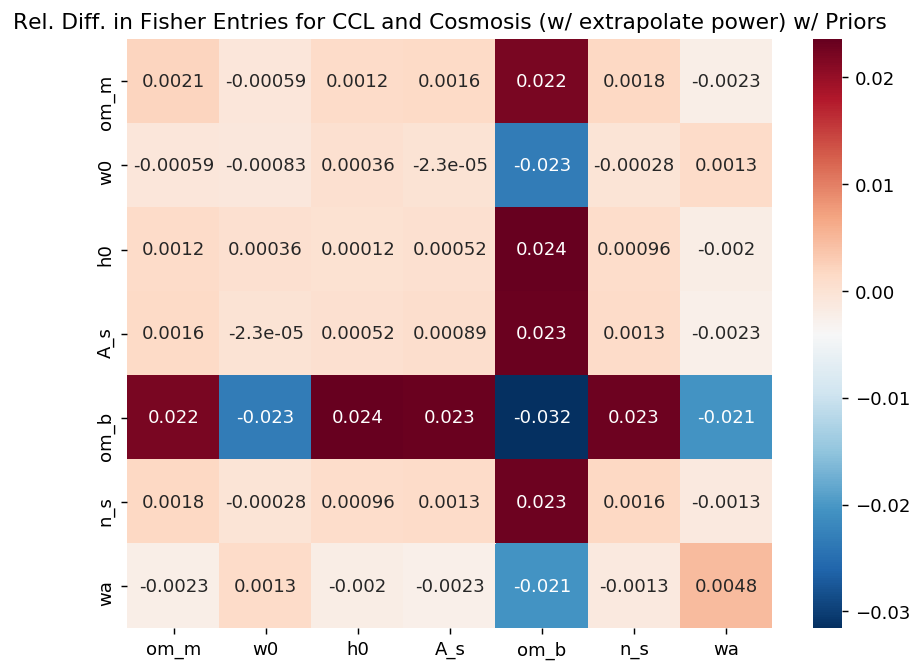

In [36]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher_priors - ccl_binned_fisher_priors)/abs(ccl_binned_fisher_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for CCL and Cosmosis (w/ extrapolate power) w/ Priors")
plt.show()

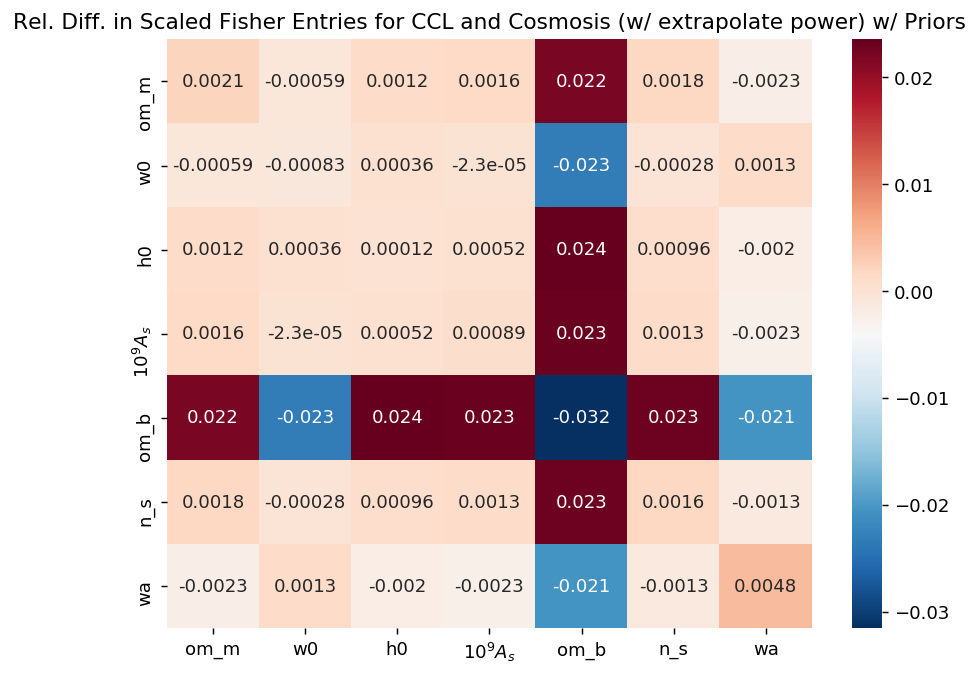

In [14]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher_priors_scaled - ccl_binned_fisher_priors_scaled)/abs(ccl_binned_fisher_priors_scaled), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Scaled Fisher Entries for CCL and Cosmosis (w/ extrapolate power) w/ Priors")
plt.show()

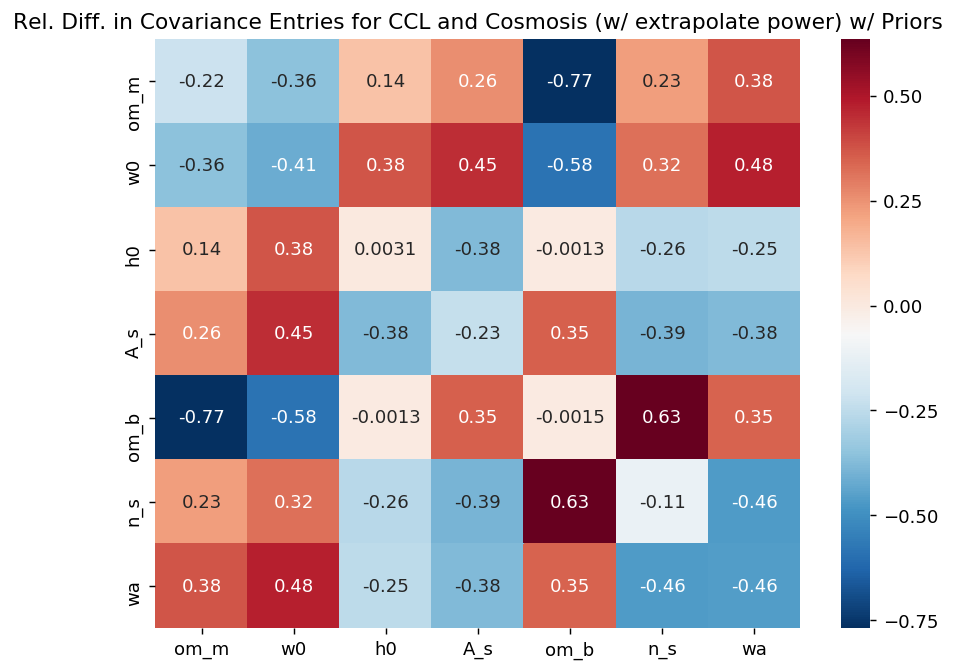

In [33]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_cov_priors - ccl_binned_cov_priors)/abs(ccl_binned_cov_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Covariance Entries for CCL and Cosmosis (w/ extrapolate power) w/ Priors")
plt.savefig("plots/rel_diff_cov_CCL_Cosmosis_ep_priors.png")
plt.show()

In [19]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_cov_scaled_priors - ccl_binned_cov_scaled_priors)/abs(ccl_binned_cov_scaled_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Scaled Covariance Entries for CCL and Cosmosis (w/ extrapolate power) w/ Priors")
# plt.savefig("plots/rel_diff_cov_CCL_Cosmosis_ep_priors.png")
plt.show()

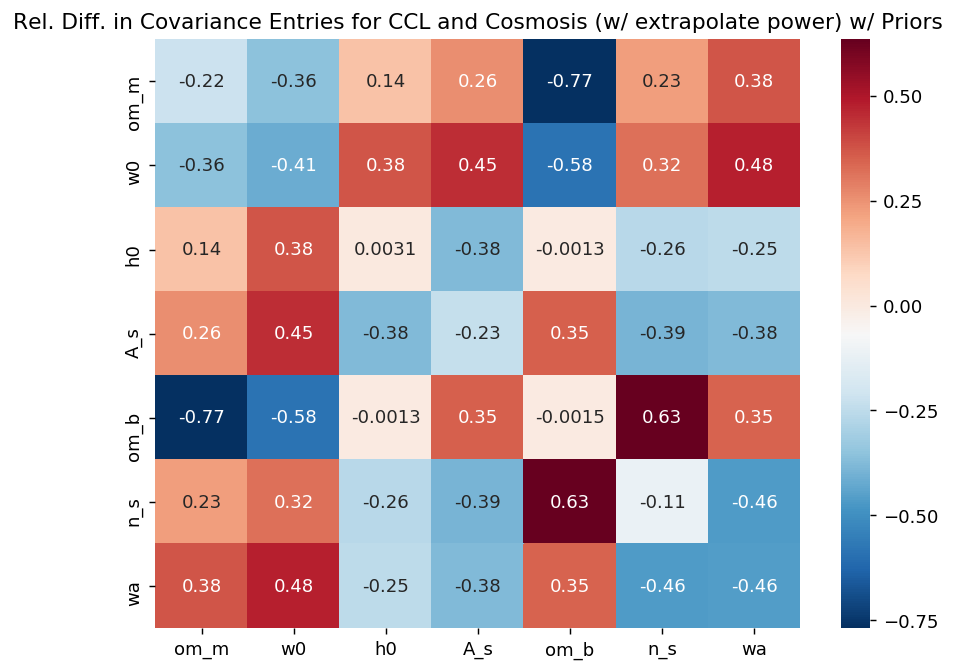

In [33]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_cov_priors - ccl_binned_cov_priors)/abs(ccl_binned_cov_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Covariance Entries for CCL and Cosmosis (w/ extrapolate power) w/ Priors")
plt.savefig("plots/rel_diff_cov_CCL_Cosmosis_ep_priors.png")
plt.show()

In [25]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher - cosmosis_no_ep_binned_fisher)/abs(cosmosis_no_ep_binned_fisher), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for Cosmosis (w/ and w/out extrapolate power) w/out Priors")
plt.show()

In [37]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher_priors - cosmosis_no_ep_binned_fisher_priors)/abs(cosmosis_no_ep_binned_fisher_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for Cosmosis (w/ and w/out extrapolate power) w/ Priors")
plt.show()

Print the determinants the covariance matrices

In [27]:
print("Determinant of ccl fisher matrix:", np.linalg.det(ccl_binned_fisher))
print("Determinant of cosmosis fisher matrix:", np.linalg.det(cosmosis_ep_binned_fisher))

Determinant of ccl fisher matrix: 6.440505328256387e+40
Determinant of cosmosis fisher matrix: 3.3134806492070756e+41


Print the eigenvalues of the two matrices

In [26]:
ccl_w, ccl_v = np.linalg.eig(ccl_binned_fisher)
cosmosis_w, cosmosis_v = np.linalg.eig(cosmosis_ep_binned_fisher)

In [61]:
print("Eigenvalues")
eigenvalues_df = pd.DataFrame(np.vstack((ccl_w, cosmosis_w)).T, columns=["ccl", "cosmosis"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.ccl - eigenvalues_df.cosmosis)/(eigenvalues_df.ccl)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], cosmosis_v[:, i]) for i in range(len(ccl_v))]
eigenvalues_df

Eigenvalues


ccl      cosmosis  relative difference  \
0  0.000000e+00  0.000000e+00             0.000000   
1  5.401995e+22  5.406802e+22            -0.000890   
2  9.608576e+04  9.309975e+04             0.031076   
3  1.726895e+04  1.728110e+04            -0.000704   
4  1.387829e+03  1.271947e+03             0.083499   
5  2.664717e+02  3.059984e+02            -0.148334   
6  2.744762e+00  8.332646e+00            -2.035836   

   dot product of resp. eigenvecs  
0                        1.000000  
1                        1.000000  
2                        0.999795  
3                        0.999968  
4                       -0.999896  
5                       -0.845581  
6                        0.996564

## Check the C_ells

### Binned

In [6]:
nbins = 5
orderings = [(i, j) for j in range(1, nbins+1) for i in range(1, j+1)]

In [47]:
cosmosis_c_ells = np.loadtxt("ccl_cosmosis_binned_comparison/out_cosmosis/Cl_fid.dat")
cosmosis_c_ells = pd.DataFrame(cosmosis_c_ells[:, 1:], index=cosmosis_c_ells[:, 0], columns=orderings)

In [48]:
ccl_c_ells = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/Cl_fid_binned.dat")
ccl_c_ells = pd.DataFrame(ccl_c_ells[:, 1:], index=ccl_c_ells[:, 0], columns=orderings)

Raw Plots

In [49]:
axes = cosmosis_c_ells.plot(subplots=True, logx=True, layout=(5,3), figsize=(15,20), label="Cosmosis", alpha=0.65)
_ = ccl_c_ells.plot(ax=axes, subplots=True, logx=True, label="CCl", linestyle="--", alpha=0.65)
for i, ax in enumerate(axes.flatten()):
    ax.legend(["Cosmosis (%d, %d)"%orderings[i], "CCL (%d, %d)"%orderings[i]])
# plt.tight_layout()
plt.show()

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/numpy/ma/core.py:6717: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


relative differences

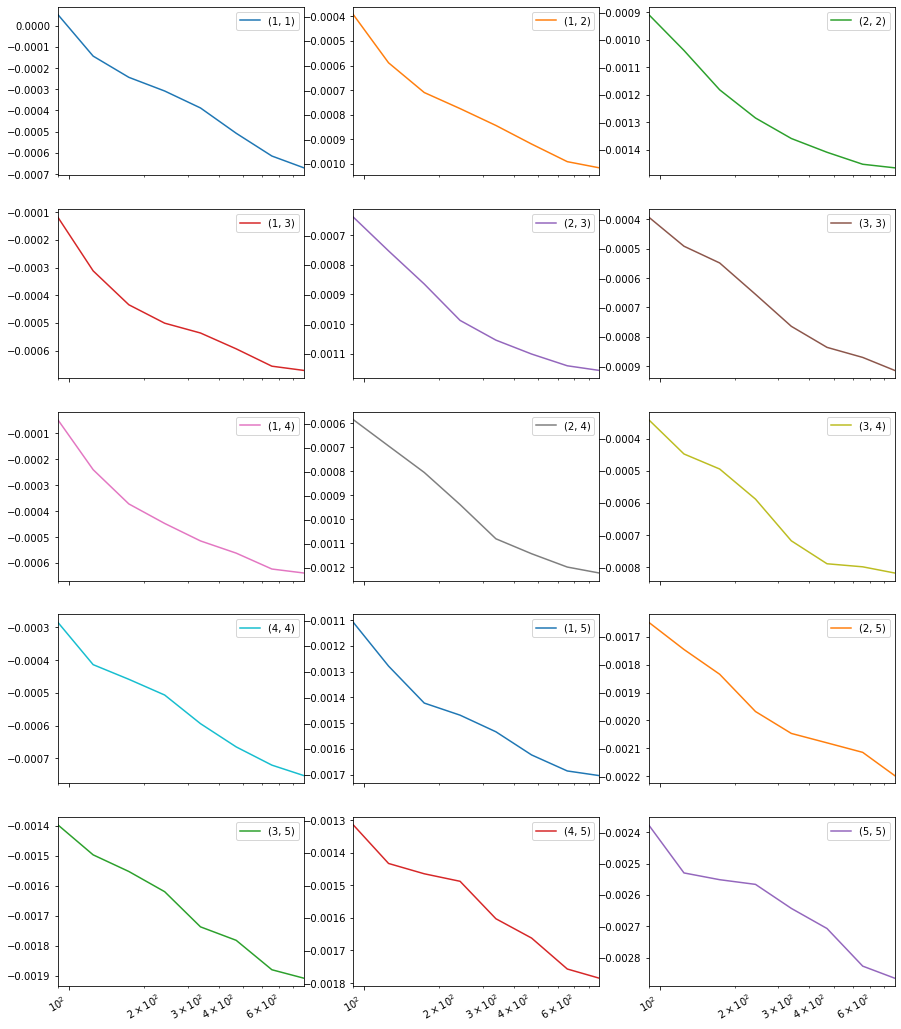

In [50]:
((cosmosis_c_ells - ccl_c_ells)/ccl_c_ells).plot(subplots=True, logx=True, layout=(5,3), figsize=(15,20))
plt.show()

### Unbinned

In [51]:
cosmosis_c_ells_unbinned = np.loadtxt("ccl_cosmosis_binned_comparison/out_cosmosis/Cl_fid_unbinned.dat")
cosmosis_c_ells_unbinned = pd.DataFrame(cosmosis_c_ells_unbinned[:, 1:], index=cosmosis_c_ells_unbinned[:, 0], columns=orderings)

In [52]:
ccl_c_ells_unbinned = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/Cl_fid.dat")
ccl_c_ells_unbinned = pd.DataFrame(ccl_c_ells_unbinned[:, 1:], index=ccl_c_ells_unbinned[:, 0], columns=orderings)

Raw Plots

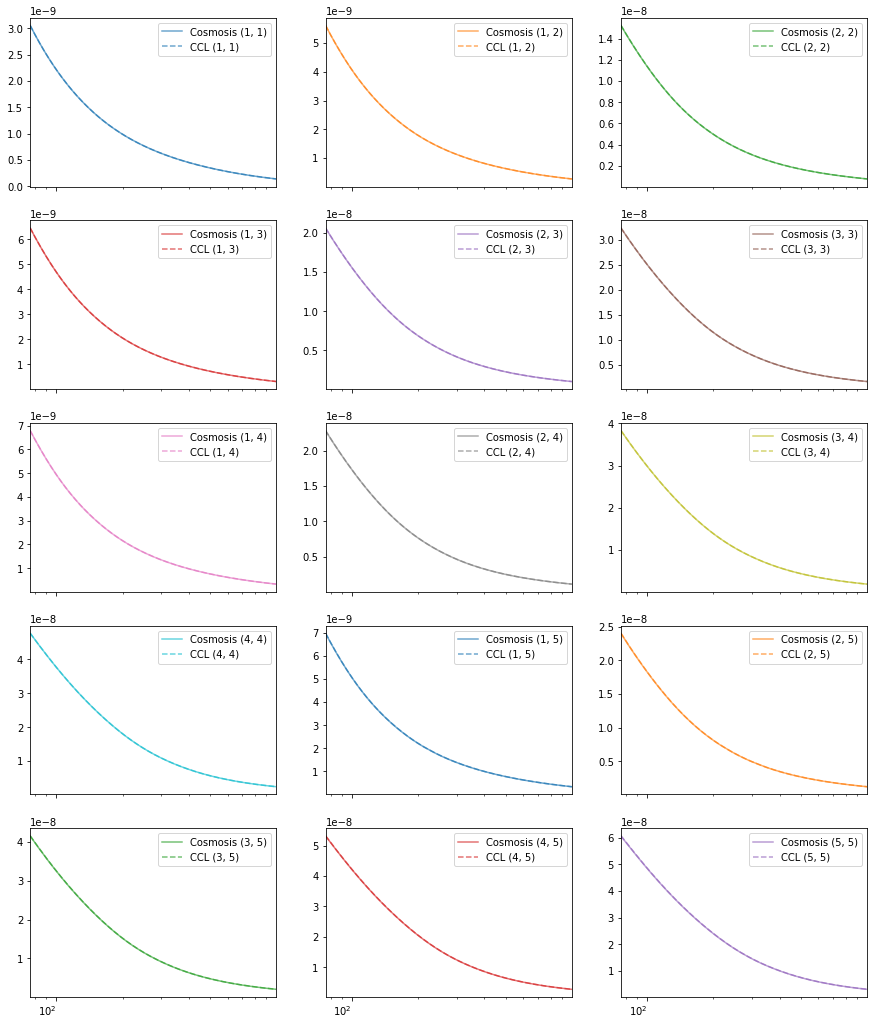

In [53]:
axes = cosmosis_c_ells_unbinned.plot(subplots=True, logx=True, layout=(5,3), figsize=(15,20), label="Cosmosis", alpha=0.65)
_ = ccl_c_ells_unbinned.plot(ax=axes, subplots=True, logx=True, label="CCl", linestyle="--", alpha=0.65)
for i, ax in enumerate(axes.flatten()):
    ax.legend(["Cosmosis (%d, %d)"%orderings[i], "CCL (%d, %d)"%orderings[i]])
# plt.tight_layout()
plt.show()

relative differences

In [54]:
((cosmosis_c_ells_unbinned - ccl_c_ells_unbinned)/ccl_c_ells_unbinned).plot(subplots=True, logx=True, layout=(5,3), figsize=(15,20))
plt.show()

## Check the Covariance Matrices

### Binned

In [58]:
cosmosis_cov_mat = np.loadtxt("ccl_cosmosis_binned_comparison/out_cosmosis/output_covmat_binned/90.0.mat")
ccl_cov_mat = np.loadtxt("ccl_cosmosis_binned_comparison/out_ccl/output_covmat_binned/90.0.mat")

In [59]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
# paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((ccl_cov_mat - cosmosis_cov_mat)/abs(ccl_cov_mat), 
            annot=False, 
            cmap="RdBu_r",
#             xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Relative Difference in Unbinned Cov Mat for CCL and Cosmosis")
plt.show()

## Check the Derivs

In [2]:
import os

In [3]:
cosmosis_no_ep_derivs = []
cosmosis_ep_derivs = []
ccl_derivs = []

In [4]:
deriv_list = [i for i in os.listdir("ccl_cosmosis_binned_comparison/out_cosmosis_extrapolate_power/") if i.startswith("deriv")]
deriv_list.sort()

In [7]:
root = "ccl_cosmosis_binned_comparison/out_cosmosis_extrapolate_power/"
for i in deriv_list:
    temp = np.loadtxt(root + i)
    cosmosis_ep_derivs.append(pd.DataFrame(temp[:, 1:], index=temp[:, 0], 
                                        columns=["%d,%d"%(i[0], i[1]) for i in orderings]))

In [8]:
root = "ccl_cosmosis_binned_comparison/out_cosmosis_no_extrapolate_power/"
for i in deriv_list:
    temp = np.loadtxt(root + i)
    cosmosis_no_ep_derivs.append(pd.DataFrame(temp[:, 1:], index=temp[:, 0], 
                                        columns=["%d,%d"%(i[0], i[1]) for i in orderings]))

In [9]:
root = "ccl_cosmosis_binned_comparison/out_ccl/"
for i in deriv_list:
    temp = np.loadtxt(root + i)
    ccl_derivs.append(pd.DataFrame(temp[:, 1:], index=temp[:, 0],
                                  columns=["%d,%d"%(i[0], i[1]) for i in orderings]))

In [12]:
deriv_list

['deriv_A_s.dat',
 'deriv_h0.dat',
 'deriv_n_s.dat',
 'deriv_om_b.dat',
 'deriv_om_m.dat',
 'deriv_w0.dat',
 'deriv_wa.dat']

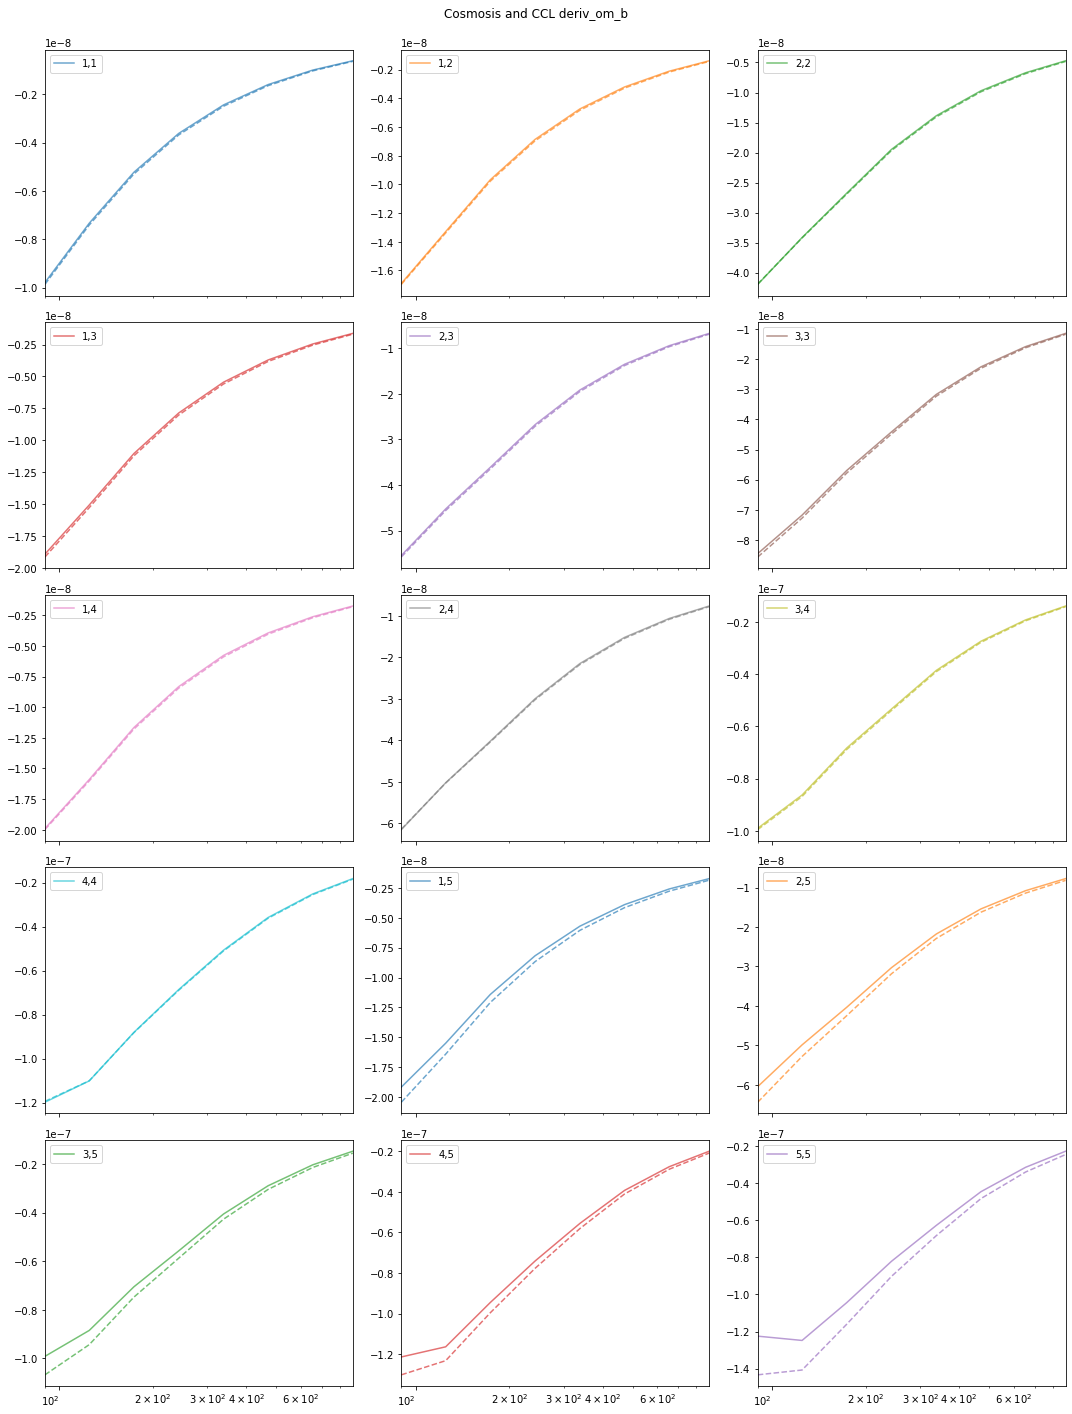

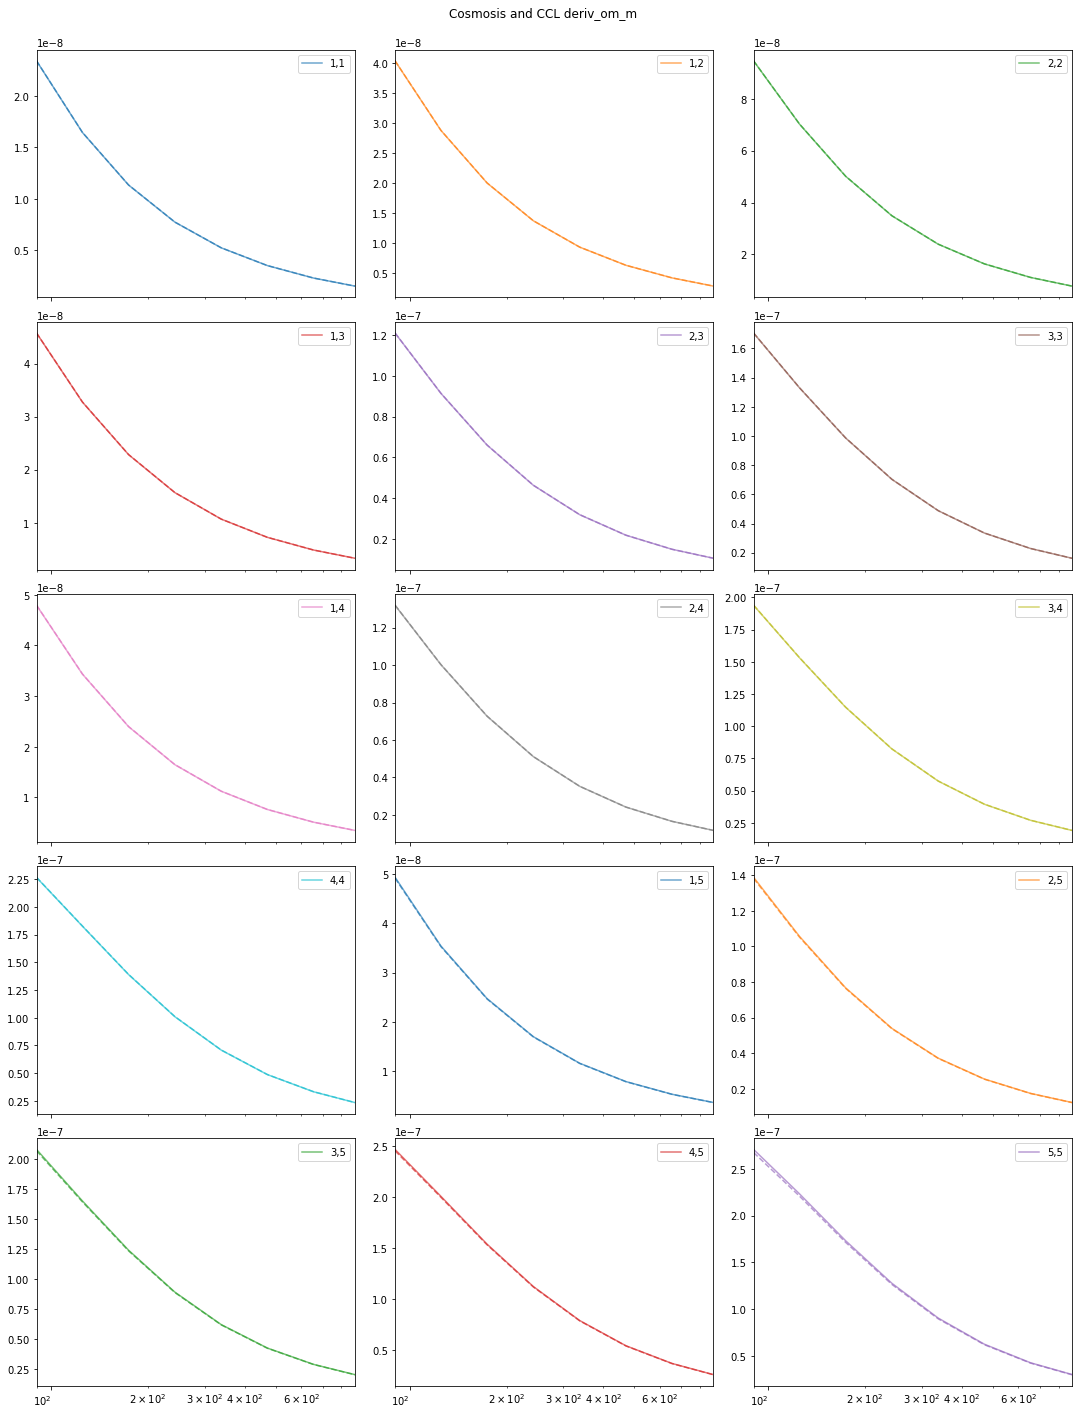

In [67]:
 for i in range(len(deriv_list)):
    ax = cosmosis_derivs[i].plot(logx=True, subplots=True, layout=(5,3), figsize=(15,20), alpha=0.65, 
                                 title="Cosmosis and CCL %s"%deriv_list[i][:-4])
    ccl_derivs[i].plot(ax=ax, subplots=True, linestyle="--", alpha=0.65, legend=False)
    fig = plt.gcf()
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

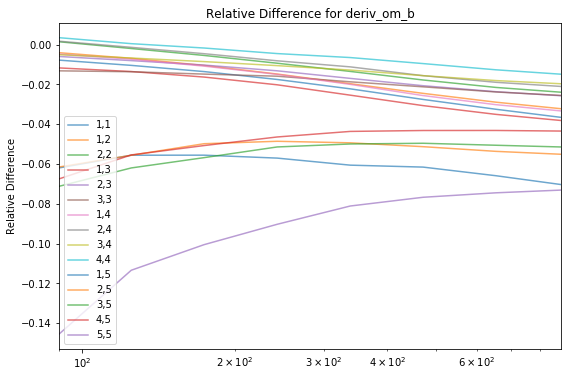

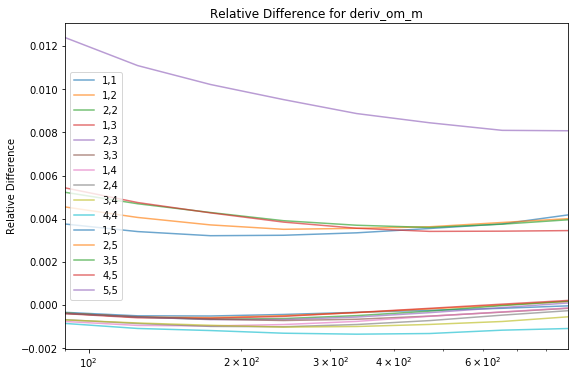

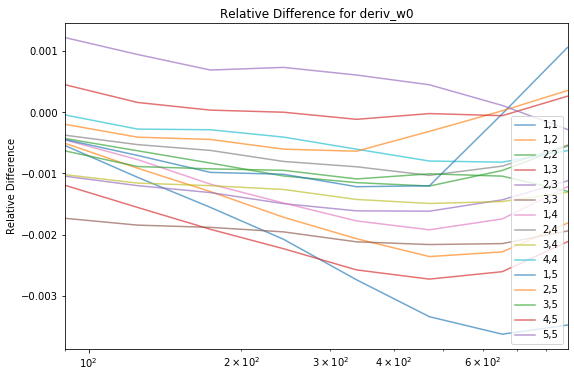

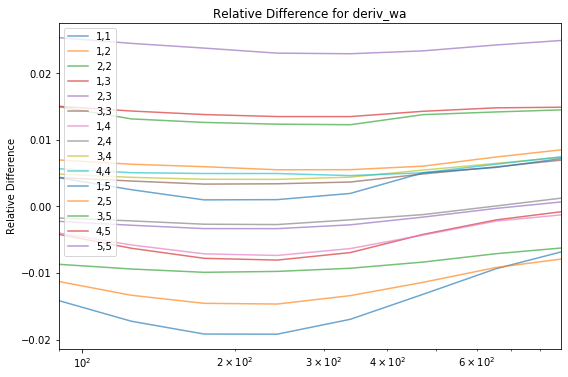

In [13]:
for i in range(len(deriv_list)):
    ((cosmosis_no_ep_derivs[i] - ccl_derivs[i])/ccl_derivs[i])\
    .plot(logx=True, layout=(5,3), figsize=(9,6), alpha=0.65, 
          title="Relative Difference for %s"%deriv_list[i][:-4])
    plt.ylabel("Relative Difference")
    plt.show()

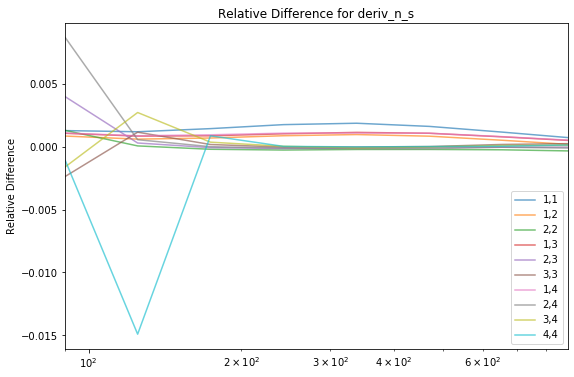

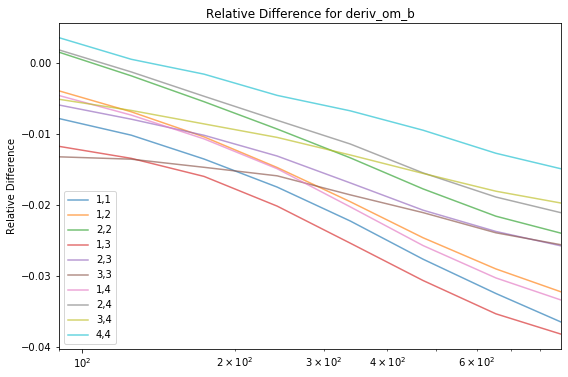

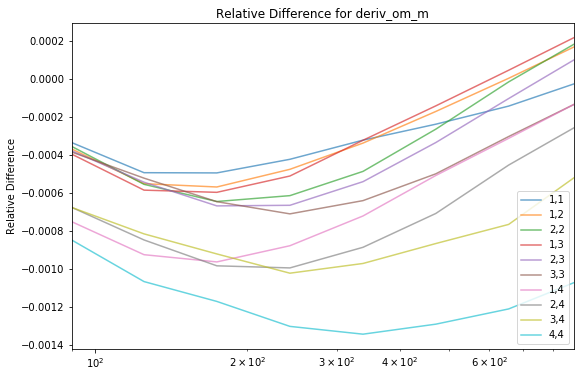

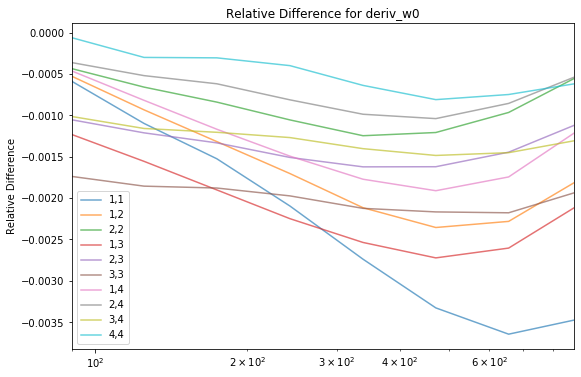

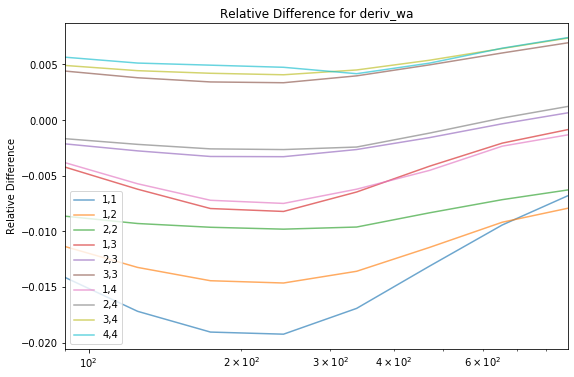

In [17]:
for i in range(len(deriv_list)):
    ((cosmosis_ep_derivs[i].iloc[:,:-5] - ccl_derivs[i].iloc[:,:-5])/ccl_derivs[i].iloc[:,:-5])\
    .plot(logx=True, layout=(5,3), figsize=(9,6), alpha=0.65, 
          title="Relative Difference for %s"%deriv_list[i][:-4])
    plt.ylabel("Relative Difference")
    plt.show()

# One bin Covariance Testing

In [1]:
def one_bin_cov(fsky, Clbins, num_dens, out_filename):
    added_shotnoise = (Clbins[:, 1] + 1.0/num_dens)**2
    prefactor = 2.0/((2.0 * Clbins[:, 0] + 1.)*fsky)
    covariance = prefactor * added_shotnoise
    cov_matrix = np.diag(covariance)
#     np.savetxt(X=cov_matrix, fname=out_filename+"onebin.mat")
    return cov_matrix

In [3]:
fsky = 0.48
Cls = np.loadtxt("Cl_fid_binned.dat")
num_dens = np.loadtxt("num_dens_lensing.dat")

In [29]:
Clbins = Cls[:, :2]
numdens = 1./num_dens[0]

In [28]:
1/(10.*4.25*10**10*(1/60)**2)

8.470588235294117e-09

In [25]:
num_dens

array([3.86213760e-09, 4.00942880e-09, 9.60205937e-09, 2.62935916e-08,
       7.39238278e-08])

In [22]:
Clbins

array([[9.00000000e+01, 2.52954057e-09],
       [1.25000000e+02, 1.72026049e-09],
       [1.74000000e+02, 1.17107876e-09],
       [2.42500000e+02, 8.03310671e-10],
       [3.38000000e+02, 5.53585220e-10],
       [4.70500000e+02, 3.79478112e-10],
       [6.55000000e+02, 2.54280185e-10],
       [8.81000000e+02, 1.71263836e-10]])

In [30]:
covs = one_bin_cov(fsky, Clbins, numdens, "")
covs

array([[9.40459250e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.17316872e-19, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.02450655e-19, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.86611862e-19,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.20006204e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.95793693e-20, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.38548670e-20, 0.

In [31]:
ans = 0
for i in range(len(covs)):
    ans += (Clbins[i, 1]/np.sqrt(sum(covs[i])))
ans

13.901486411238924

In [19]:
# i=0
# sig_to_noise = 0
# for all_data in Clbins:
#     ell = all_data[0]
#     data  = all_data[1:]
#     #if ell >= 76:
#     #    print ell,
#     cov = covs[i]
#     cov_inv = np.linalg.inv(cov)
#     contrib = np.linalg.multi_dot([data, cov_inv, data])
#     #print contrib
#     sig_to_noise += contrib
#     i+= 1
# sig_to_noise =  np.sqrt(sig_to_noise)

In [32]:
ccl.linear_matter_power?

Signature: ccl.linear_matter_power(cosmo, k, a)
Docstring:
The linear matter power spectrum; Mpc^3.

Args:
    cosmo (:obj:`Cosmology`): Cosmological parameters.
    k (float or array_like): Wavenumber; Mpc^-1.
    a (float): Scale factor.

Returns:
    float or array_like: Linear matter power spectrum; Mpc^3.
File:      ~/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/pyccl/power.py
Type:      function


# $10^9 A_s$

# Binned Fisher Matrices

### Load cosmosis data (with extrapolate power)

In [12]:
root_dir = "ccl_cosmosis_binned_comparison/10e9_A_s/out_cosmosis/"
cosmosis_ep_binned_fisher = np.loadtxt(root_dir+ "fisher_out.dat")
cosmosis_ep_binned_fisher_priors = np.loadtxt(root_dir+ "fisher_out_with_priors.dat")
cosmosis_ep_fom_om_m_A_s = np.loadtxt(root_dir+ "fom_om_m_A_s.dat")
cosmosis_ep_fom_w0_wa = np.loadtxt(root_dir+ "fom_w0_wa.dat")
cosmosis_ep_fom_om_m_A_s_priors = np.loadtxt(root_dir+ "fom_om_m_A_s_priors.dat")
cosmosis_ep_fom_w0_wa_priors = np.loadtxt(root_dir+ "fom_w0_wa_priors.dat")
# cosmosis_ep_c_ells = np.loadtxt(root_dir+ "Cl_fid_unbinned.dat")
# cosmosis_ep_c_ells_binned = np.loadtxt(root_dir+ "Cl_fid.dat")

### Load CCL data

In [5]:
ccl_binned_fisher = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/fisher_out.dat")
ccl_binned_fisher_priors = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/fisher_out_with_priors.dat")
ccl_fom_om_m_A_s = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/fom_om_m_A_s.dat")
ccl_fom_w0_wa = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/fom_w0_wa.dat")
ccl_fom_om_m_A_s_priors = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/fom_om_m_A_s_priors.dat")
ccl_fom_w0_wa_priors = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/fom_w0_wa_priors.dat")
ccl_c_ells = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/Cl_fid.dat")
ccl_c_ells_binned = np.loadtxt("ccl_cosmosis_binned_comparison/10e9_A_s/out_ccl/Cl_fid_binned.dat")

## Figures of Merit

### FoM for $w_0$ $w_a$

#### No Priors

In [14]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_w0_wa),
print("CCL", ccl_fom_w0_wa)
print("Relative Difference with EP", (cosmosis_ep_fom_w0_wa - ccl_fom_w0_wa)/ccl_fom_w0_wa)

Cosmosis with Extrapolate Power 31.44049733855853
CCL 266.4169472990912
Relative Difference with EP -0.8819876225694379


#### With Priors

In [15]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_w0_wa_priors),
print("CCL", ccl_fom_w0_wa_priors)
print("Relative Difference without EP", (cosmosis_ep_fom_w0_wa_priors - ccl_fom_w0_wa_priors)/ccl_fom_w0_wa_priors)

Cosmosis with Extrapolate Power 61.75685182657887
CCL 523.9519599079514
Relative Difference without EP -0.8821326065133368


### FoM for $\Omega_m$ $A_s$

#### No Priors

In [20]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_om_m_A_s),
print("CCL", ccl_fom_om_m_A_s)
print("Relative Difference with EP", (cosmosis_ep_fom_om_m_A_s - ccl_fom_om_m_A_s)/ccl_fom_om_m_A_s)

Cosmosis with Extrapolate Power 181.13726485890928
CCL 904.4402867091436
Relative Difference with EP -0.7997244621665547


#### With Priors

In [19]:
print("Cosmosis with Extrapolate Power", cosmosis_ep_fom_om_m_A_s_priors),
print("CCL", ccl_fom_om_m_A_s_priors)
print("Relative Difference with EP", (cosmosis_ep_fom_om_m_A_s_priors - ccl_fom_om_m_A_s_priors)/ccl_fom_om_m_A_s_priors)

Cosmosis with Extrapolate Power 947.7580182700218
CCL 6359.2121076220465
Relative Difference with EP -0.850962980597226


## Plot the Differences in Fisher Matrix Values

In [24]:
print("CCL Fisher Matrix")
paras = ["om_m", "w0", "h0", "10^9 A_s", "om_b", "n_s", "wa"]
pd.DataFrame(ccl_binned_fisher, index=paras, columns=paras)

CCL Fisher Matrix


om_m            w0            h0       10^9 A_s  \
om_m      1.285060e+07 -1.236906e+06  6.793411e+06  845886.343183   
w0       -1.236906e+06  1.440136e+05 -5.861523e+05  -84324.375185   
h0        6.793411e+06 -5.861523e+05  3.891357e+06  453992.549481   
10^9 A_s  8.458863e+05 -8.432438e+04  4.539925e+05   60140.195996   
om_b     -1.499717e+07  9.687440e+05 -9.752768e+06 -975875.112272   
n_s       2.597679e+06 -1.609757e+05  1.655034e+06  150614.216075   
wa       -4.206905e+05  4.820496e+04 -2.060977e+05  -29800.541555   

                  om_b           n_s             wa  
om_m     -1.499717e+07  2.597679e+06 -420690.485313  
w0        9.687440e+05 -1.609757e+05   48204.960033  
h0       -9.752768e+06  1.655034e+06 -206097.748847  
10^9 A_s -9.758751e+05  1.506142e+05  -29800.541555  
om_b      2.940524e+07 -5.073013e+06  357161.732090  
n_s      -5.073013e+06  9.600065e+05  -55026.400018  
wa        3.571617e+05 -5.502640e+04   16562.614774

In [14]:
print("Cosmosis with Extrapolate Power Fisher Matrix")
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
pd.DataFrame(cosmosis_ep_binned_fisher, index=paras, columns=paras)

Cosmosis with Extrapolate Power Fisher Matrix


om_m            w0            h0           A_s          om_b  \
om_m  1.116656e+07 -1.186852e+06  4.971792e+06  7.744924e+14 -7.057011e+06   
w0   -1.186852e+06  1.275033e+05 -5.308653e+05 -8.281706e+13  7.596441e+05   
h0    4.971792e+06 -5.308653e+05  2.225847e+06  3.465381e+14 -3.186966e+06   
A_s   7.744924e+14 -8.281706e+13  3.465381e+14  5.406802e+22 -4.954124e+14   
om_b -7.057011e+06  7.596441e+05 -3.186966e+06 -4.954124e+14  4.630764e+06   
n_s   1.370270e+06 -1.429503e+05  6.087294e+05  9.416870e+13 -8.596017e+05   
wa   -3.841361e+05  4.136777e+04 -1.725891e+05 -2.692720e+13  2.484876e+05   

               n_s            wa  
om_m  1.370270e+06 -3.841361e+05  
w0   -1.429503e+05  4.136777e+04  
h0    6.087294e+05 -1.725891e+05  
A_s   9.416870e+13 -2.692720e+13  
om_b -8.596017e+05  2.484876e+05  
n_s   1.790536e+05 -4.623379e+04  
wa   -4.623379e+04  1.348506e+04

In [32]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher - ccl_binned_fisher)/abs(ccl_binned_fisher), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for CCL and Cosmosis w/out Priors")
plt.show()

In [33]:
cosmosis_ep_binned_cov = np.linalg.inv(cosmosis_ep_binned_fisher)
cosmosis_ep_binned_cov_priors = np.linalg.inv(cosmosis_ep_binned_fisher_priors)
ccl_binned_cov = np.linalg.inv(ccl_binned_fisher)
ccl_binned_cov_priors = np.linalg.inv(ccl_binned_fisher_priors)

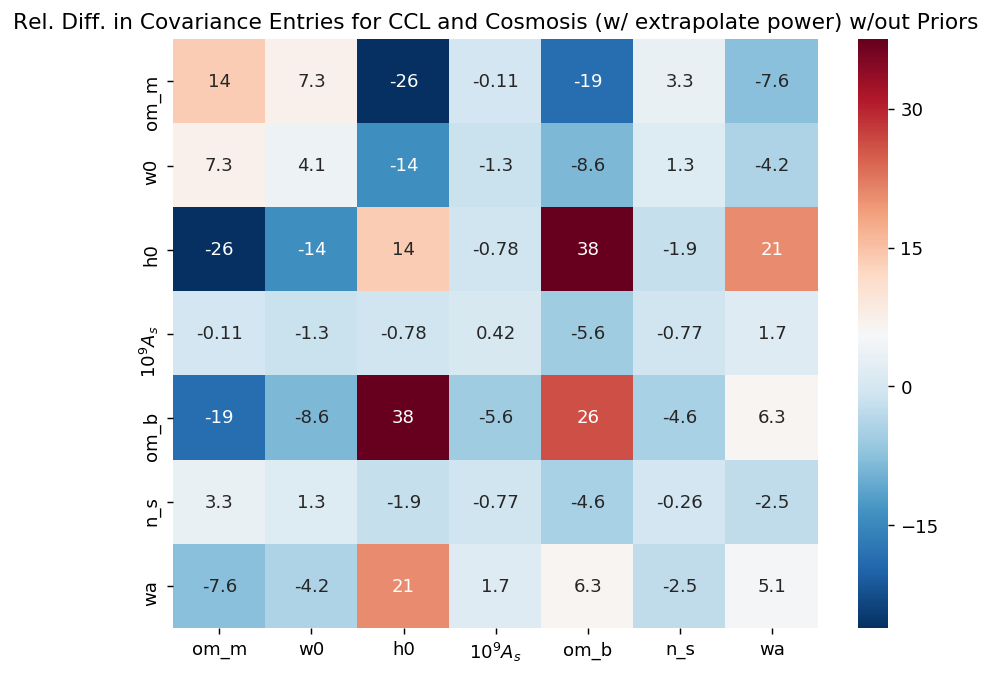

In [34]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_cov - ccl_binned_cov)/abs(ccl_binned_cov), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Covariance Entries for CCL and Cosmosis (w/ extrapolate power) w/out Priors")
plt.savefig("plots/rel_diff_cov_CCL_Cosmosis_ep.png")
plt.show()

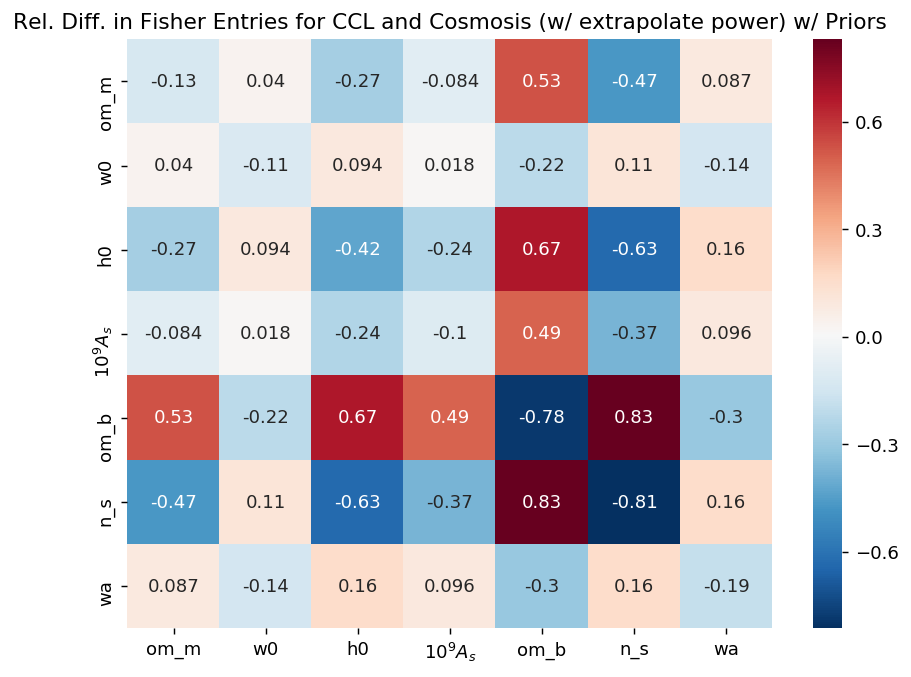

In [35]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher_priors - ccl_binned_fisher_priors)/abs(ccl_binned_fisher_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for CCL and Cosmosis (w/ extrapolate power) w/ Priors")
plt.show()

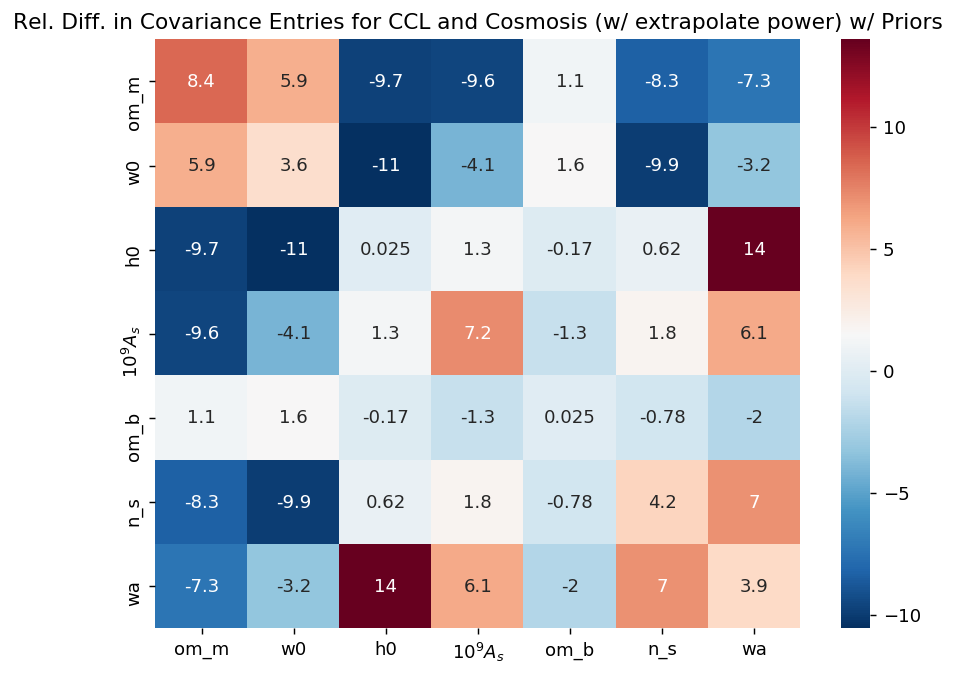

In [36]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "$10^9 A_s$", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_cov_priors - ccl_binned_cov_priors)/abs(ccl_binned_cov_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Covariance Entries for CCL and Cosmosis (w/ extrapolate power) w/ Priors")
plt.savefig("plots/rel_diff_cov_CCL_Cosmosis_ep_priors.png")
plt.show()

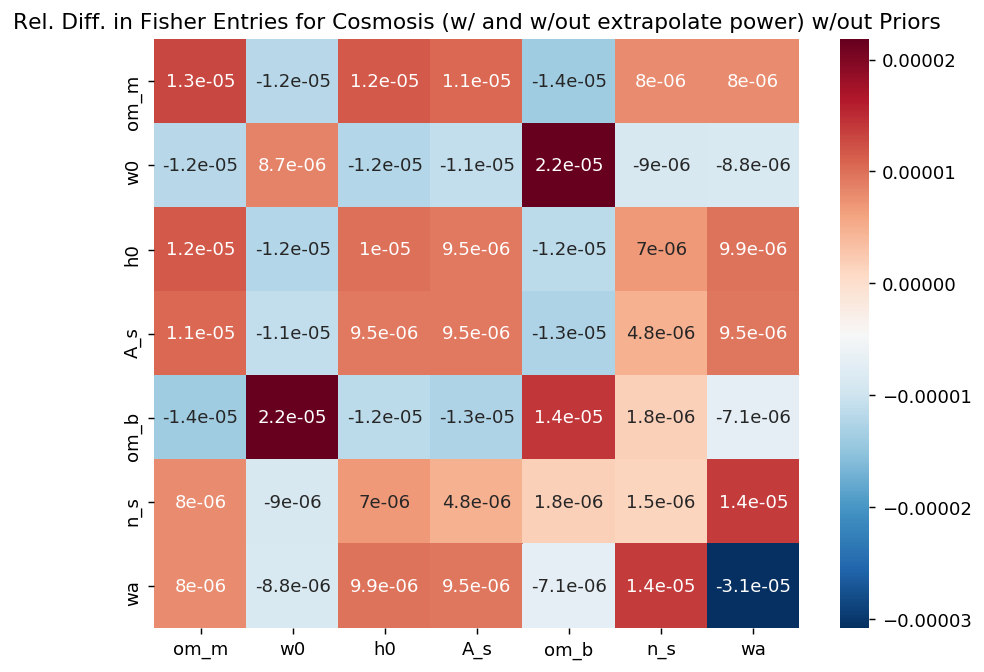

In [25]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher - cosmosis_no_ep_binned_fisher)/abs(cosmosis_no_ep_binned_fisher), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for Cosmosis (w/ and w/out extrapolate power) w/out Priors")
plt.show()

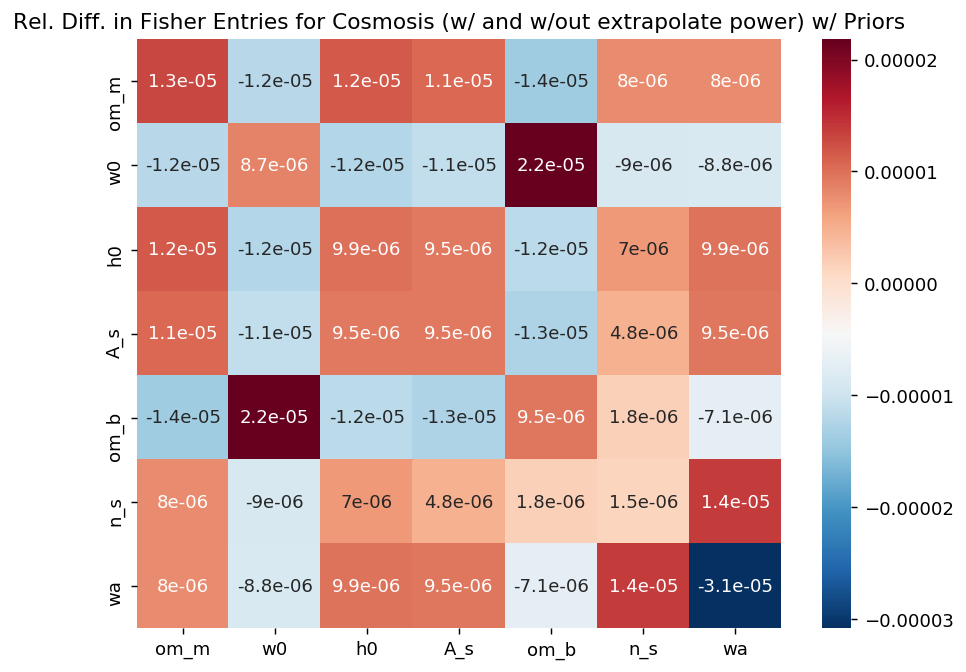

In [37]:
fig, ax = plt.subplots(figsize=(8,6), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((cosmosis_ep_binned_fisher_priors - cosmosis_no_ep_binned_fisher_priors)/abs(cosmosis_no_ep_binned_fisher_priors), 
            annot=True, 
            cmap="RdBu_r",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Rel. Diff. in Fisher Entries for Cosmosis (w/ and w/out extrapolate power) w/ Priors")
plt.show()